## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 2

### Q1. Consider the given dataset for Customer Attrition Analysis (customer_attrition.csv), which analyzes the customer behaviour to predict the likelihood of customers leaving or discontinuing their relationship with a business. 
#### The dataset has 14 features which are as follows : 
 
#### • RowNumber:- Represents the number of rows 
#### • CustomerId:- Represents customerId 
#### • Surname:- Represents surname of the customer 
#### • CreditScore:- Represents credit score of the customer 
#### • Geography:- Represents the city to which customers belongs to 
#### • Gender:- Represents Gender of the customer 
#### • Age:- Represents age of the customer 
#### • Tenure:- Represents tenure of the customer with a bank 
#### • Balance:- Represents balance hold by the customer 
#### • NumOfProducts:- Represents the number of bank services used by the customer 
#### • HasCrCard:- Represents if a customer has a credit card or not 
#### • IsActiveMember:- Represents if a customer is an active member or not 
#### • EstimatedSalary:- Represents estimated salary of the customer 
#### • Exited:- Represents if a customer is going to exit the bank or not. 
 
 
### 1. Perform the required pre-processing and write comment lines to explain the pre-processing steps. 
 
### 2. Perform experiments using (70,15,15) split and tabulate the performance in terms of Accuracy, Precision & Recall for the following experimental setup:    
### a) Number of Hidden Layers and Number of Units per Layer  
 
#### Number of Hidden Layers - Number of Units 
#### 1 - 128, 0 ,0 
#### 2 - 128, 64, 0 
#### 3 - 128, 64, 32 
 
#### b) Epochs (10,20,30)  
#### c) Activation function (Sigmoid, ReLU )  
#### d) Learning rate (0.1, 0.01,0.001)  
#### e) Visualize the training and validation loss against the epochs and comment on optimal hyperparameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("customer_attrition.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

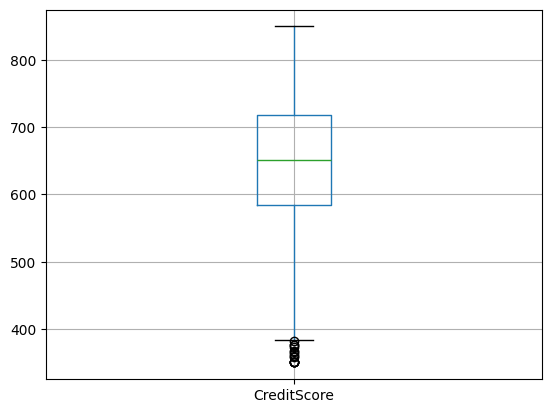

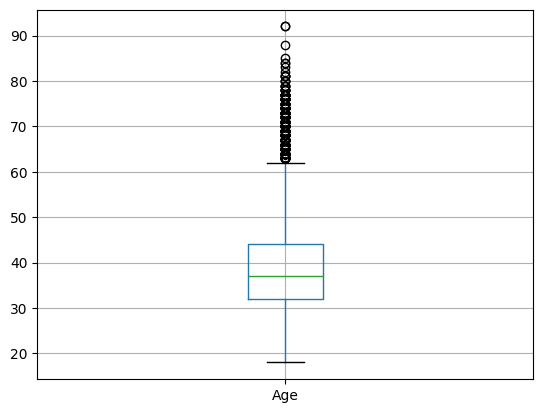

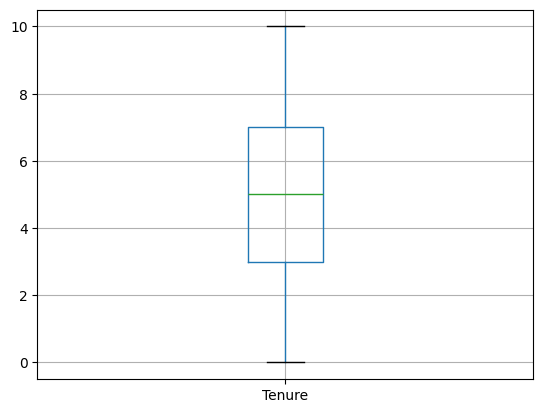

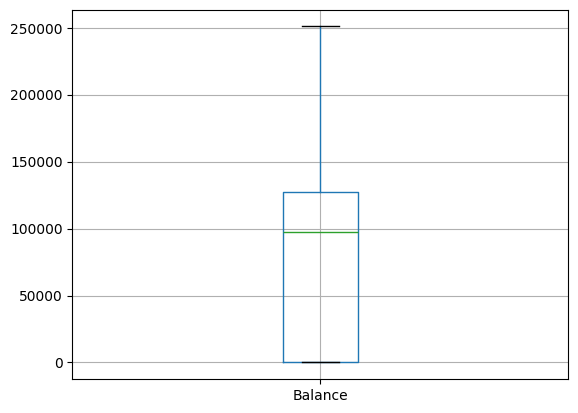

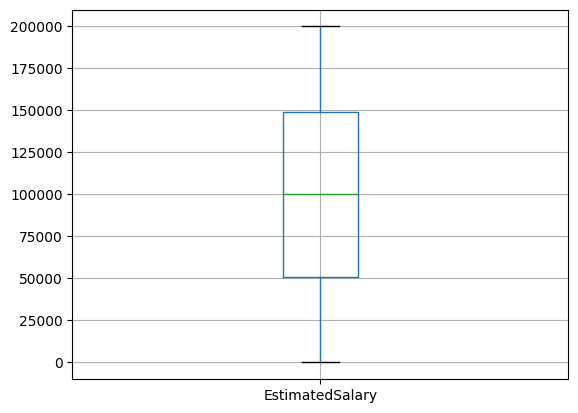

In [5]:
numeric_Col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for col in numeric_Col:
    plt.figure()
    df.boxplot([col])

In [6]:
def remOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return df[(df[col] < upper) & (df[col] > lower)]

In [7]:
print("Old Shape: ", df.shape)

for col in numeric_Col:
    df = remOutliers(df, col)

print("New Shape: ", df.shape)

Old Shape:  (10000, 13)
New Shape:  (9573, 13)


In [8]:
labelEncodeCol = ['Geography', 'Gender', 'Surname']
label_encoder = preprocessing.LabelEncoder()

for col in labelEncodeCol:
    df[col]= label_encoder.fit_transform(df[col]) 
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,1090,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,1150,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,1990,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,284,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,1778,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

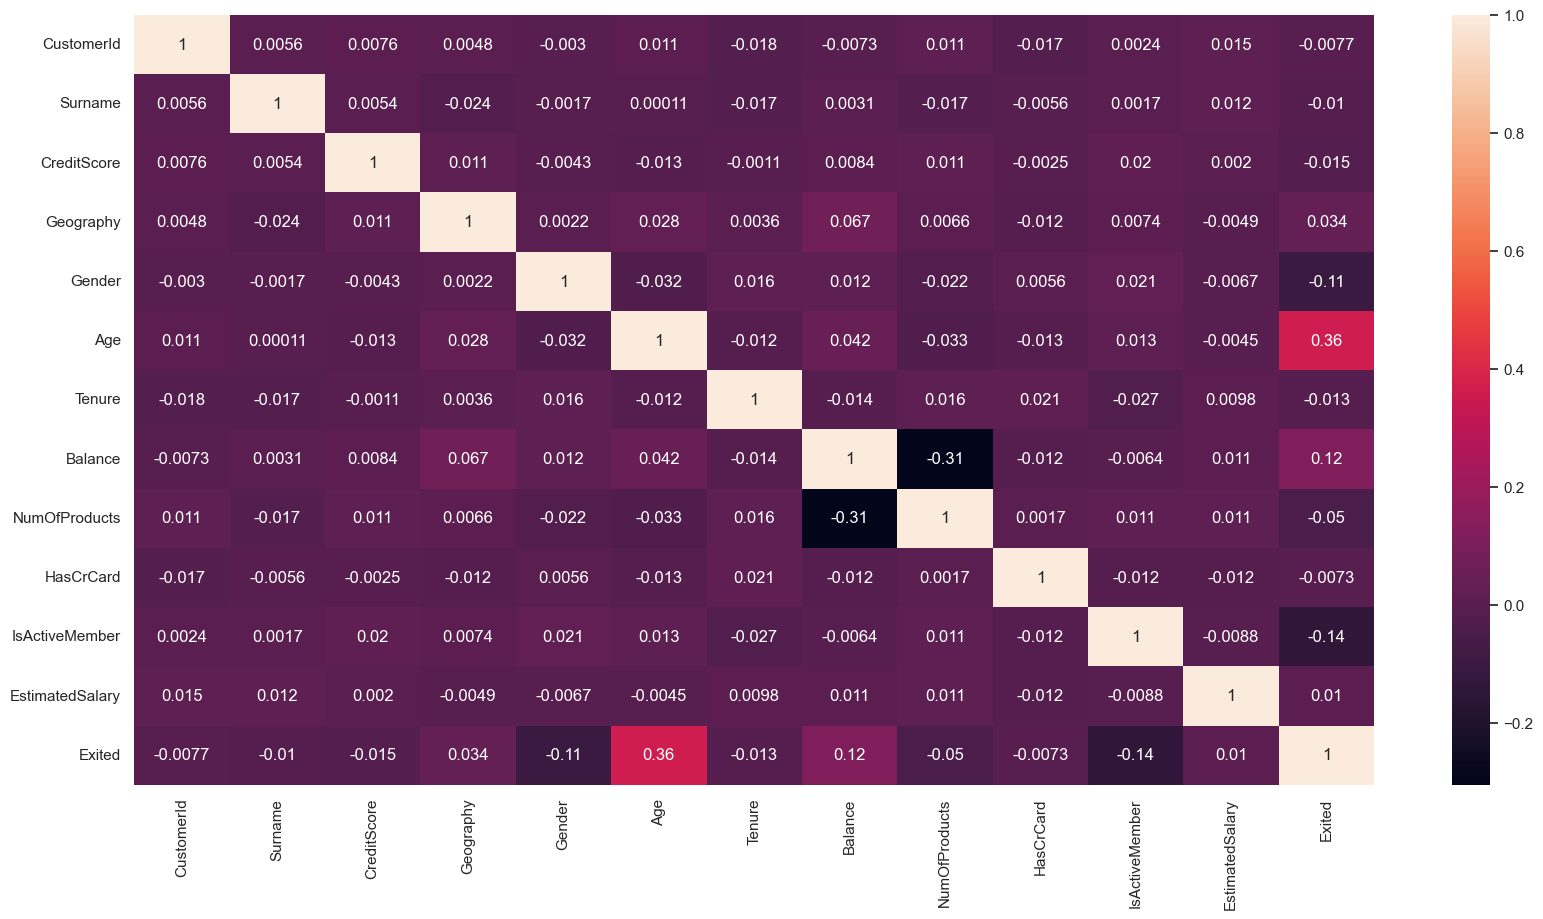

In [9]:
sns.set (rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), annot=True)

In [10]:
x = df.drop(['Exited', 'CustomerId', 'Surname'],axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=104,test_size=0.15, shuffle=True)

In [11]:
model1 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(2, activation='softmax', name='output')
])

In [12]:
model2 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(2, activation='softmax', name='output')
])

In [13]:
model3 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(32, activation='relu', name='hidden3'),
    Dense(2, activation='softmax', name='output')
])

In [14]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,666 (6.51 KB)

 Trainable params: 1,666 (6.51 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,810 (46.13 KB)

 Trainable params: 11,810 (46.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def runModels(model, rate, epoch):
    print("Model with Learning Rate: ", rate)
    print("Number of Epochs: ",epoch)
    optimizer =  Adam(learning_rate = rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    h = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.15)
        
    loss = np.array(h.history['loss'])
    val_loss = h.history['val_loss']
        
    epochRange = range(epoch)
        
    plt.plot(epochRange, loss, label = 'loss', color = 'blue')
    plt.plot(epochRange, val_loss, label = 'val_loss', color = 'orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.show()
        
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    print("_______________________________________________________________________________________________")
    print("_______________________________________________________________________________________________")

Model with Learning Rate:  0.1
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.7103 - loss: 8127.7339 - val_accuracy: 0.7961 - val_loss: 0.5146
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.7886 - loss: 0.5182 - val_accuracy: 0.7961 - val_loss: 0.5126
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.7934 - loss: 0.5113 - val_accuracy: 0.7961 - val_loss: 0.5249
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7917 - loss: 0.5163 - val_accuracy: 0.7961 - val_loss: 0.5122
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.7950 - loss: 0.5086 - val_accuracy: 0.7961 - val_loss: 0.5147
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8021 - loss: 0.5020 - val_accuracy: 0.7961 - val_loss: 0.5225
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7995 - loss: 0.5054 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━

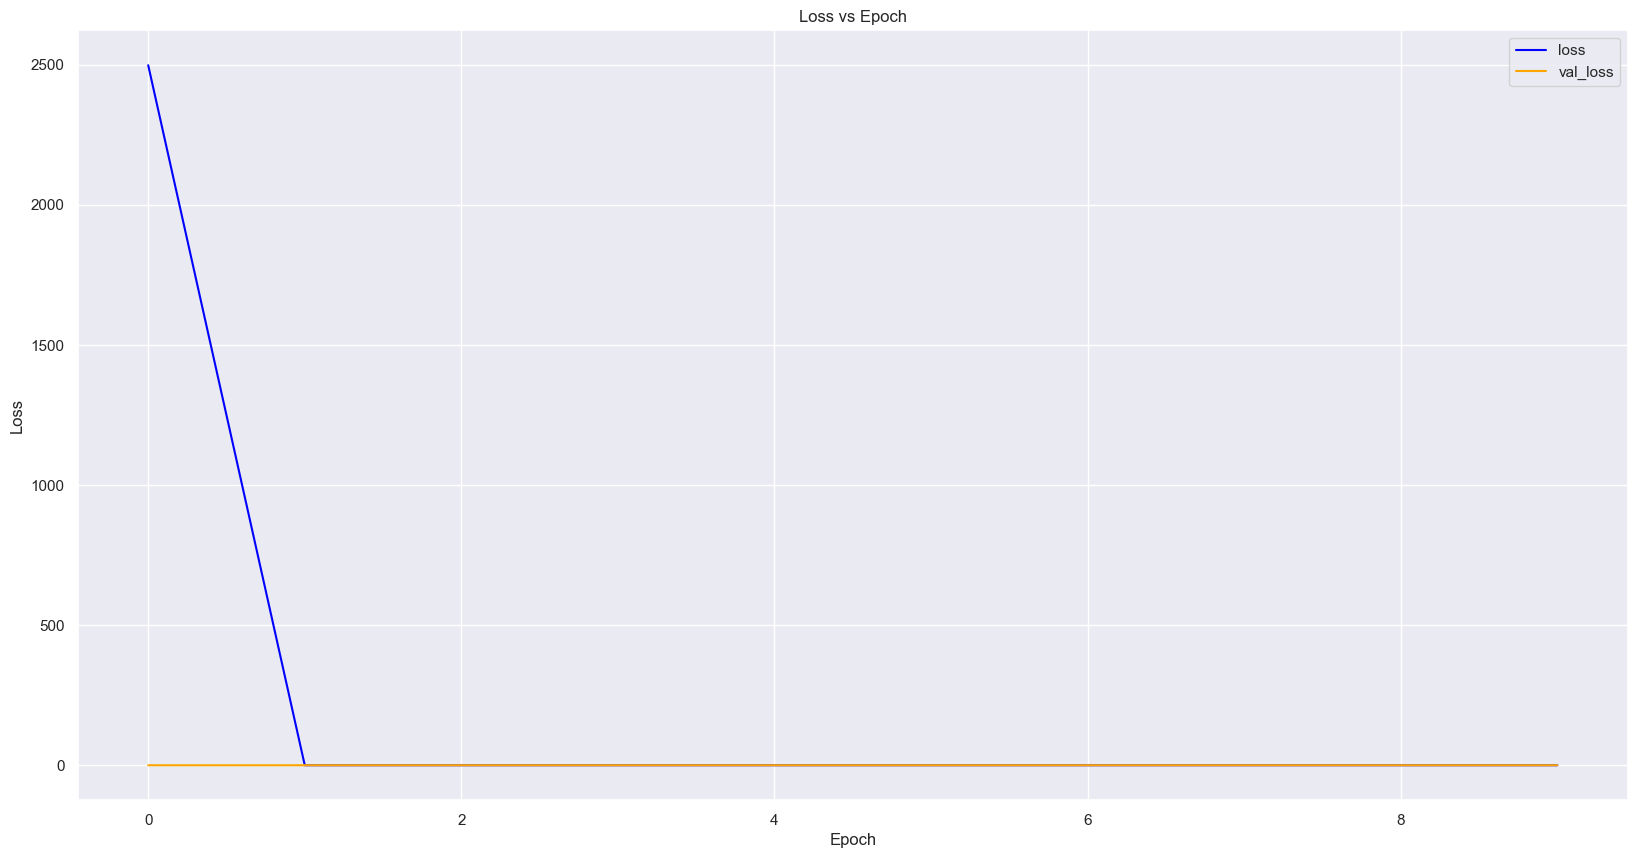

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8108 - loss: 0.4882
Test Loss: 0.483169823884964
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7563 - loss: 17468.4883 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7951 - loss: 0.5132 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7939 - loss: 0.5109 - val_accuracy: 0.7961 - val_loss: 0.5160
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.8007 - loss: 0.5087 - val_accuracy: 0.7961 - val_loss: 0.5160
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7916 - loss: 0.5190 - val

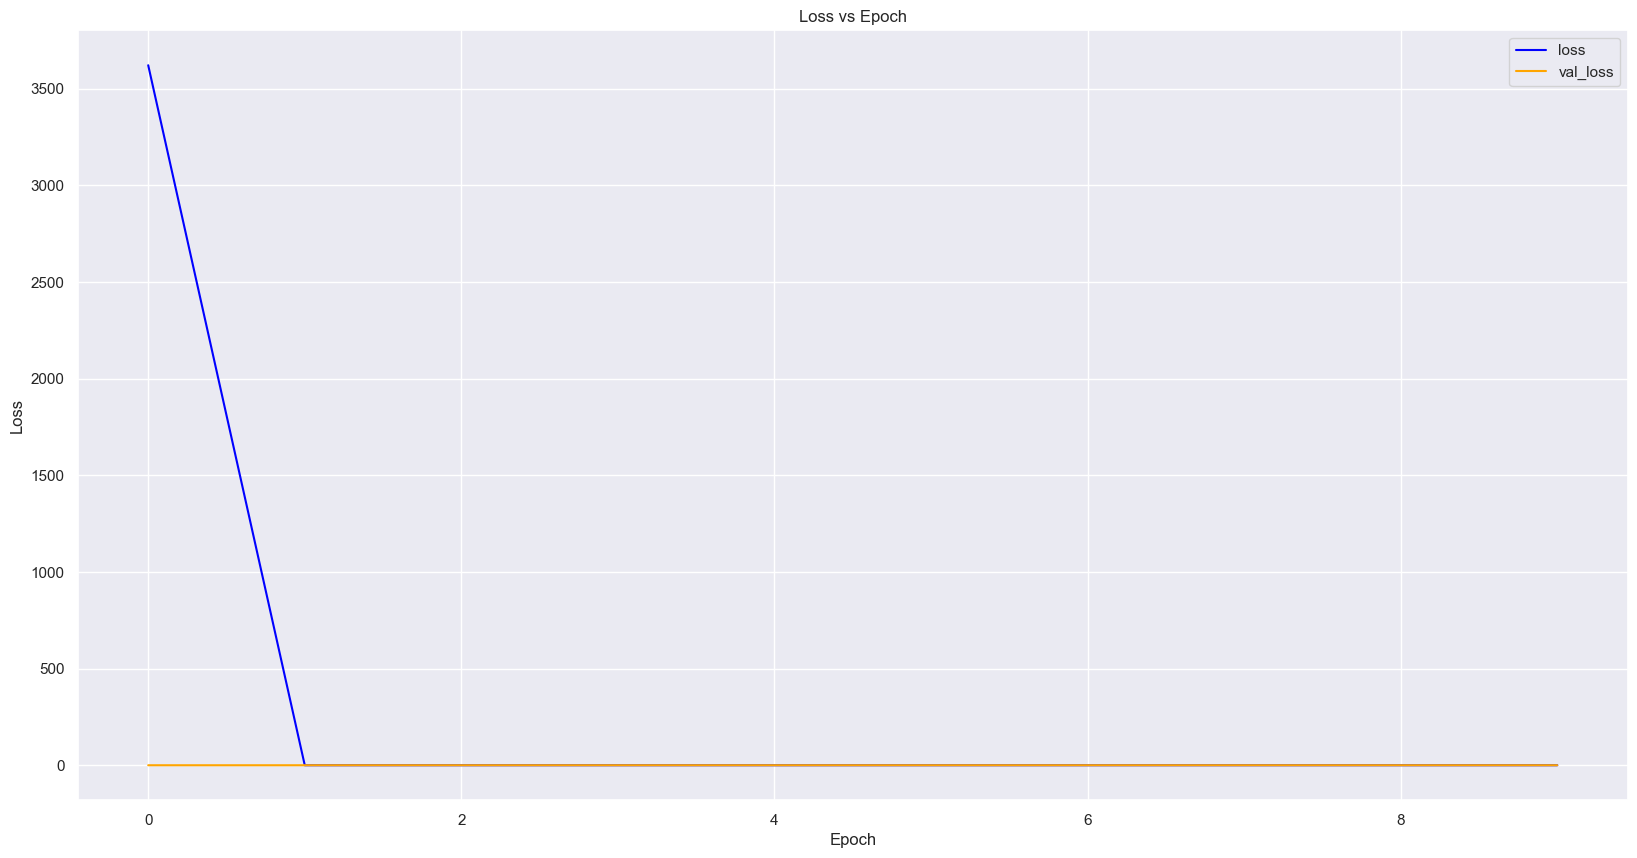

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8108 - loss: 0.4857
Test Loss: 0.48165830969810486
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7518 - loss: 32636.1992 - val_accuracy: 0.7961 - val_loss: 0.5133
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8065 - loss: 0.4946 - val_accuracy: 0.7961 - val_loss: 0.5124
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7918 - loss: 0.5143 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7942 - loss: 0.5097 - val_accuracy: 0.7961 - val_loss: 0.5184
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7989 - loss: 0.5048 - val

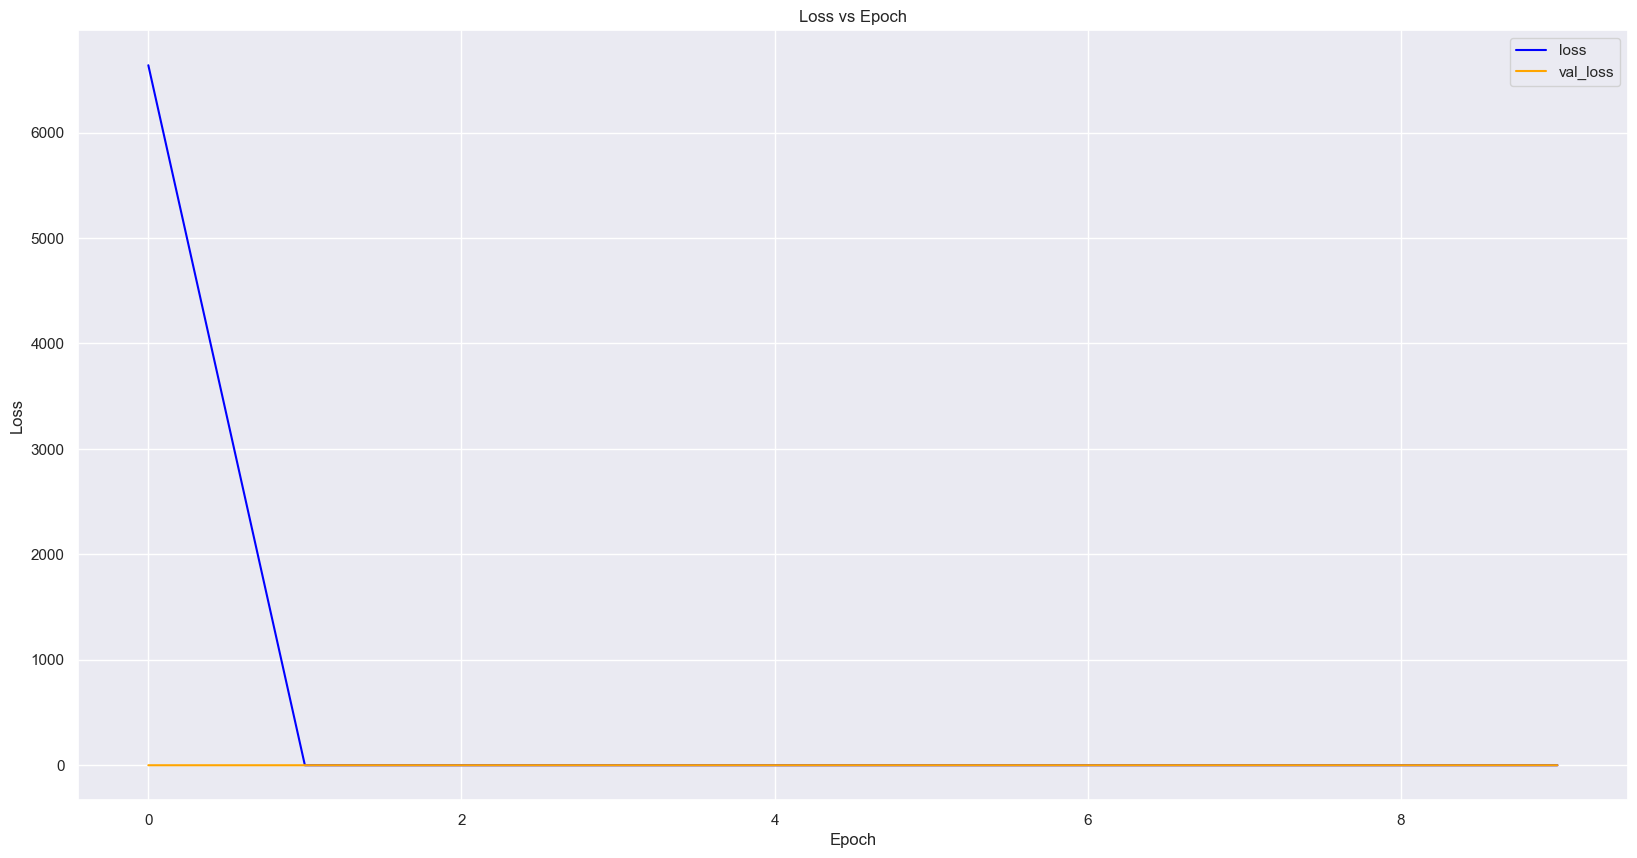

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8108 - loss: 0.4873
Test Loss: 0.48346227407455444
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7991 - loss: 0.5481 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7959 - loss: 0.5070 - val_accuracy: 0.7961 - val_loss: 0.5121
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.7994 - loss: 0.5012 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.7939 - loss: 0.5090 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7898 - loss: 0.5145 - val_

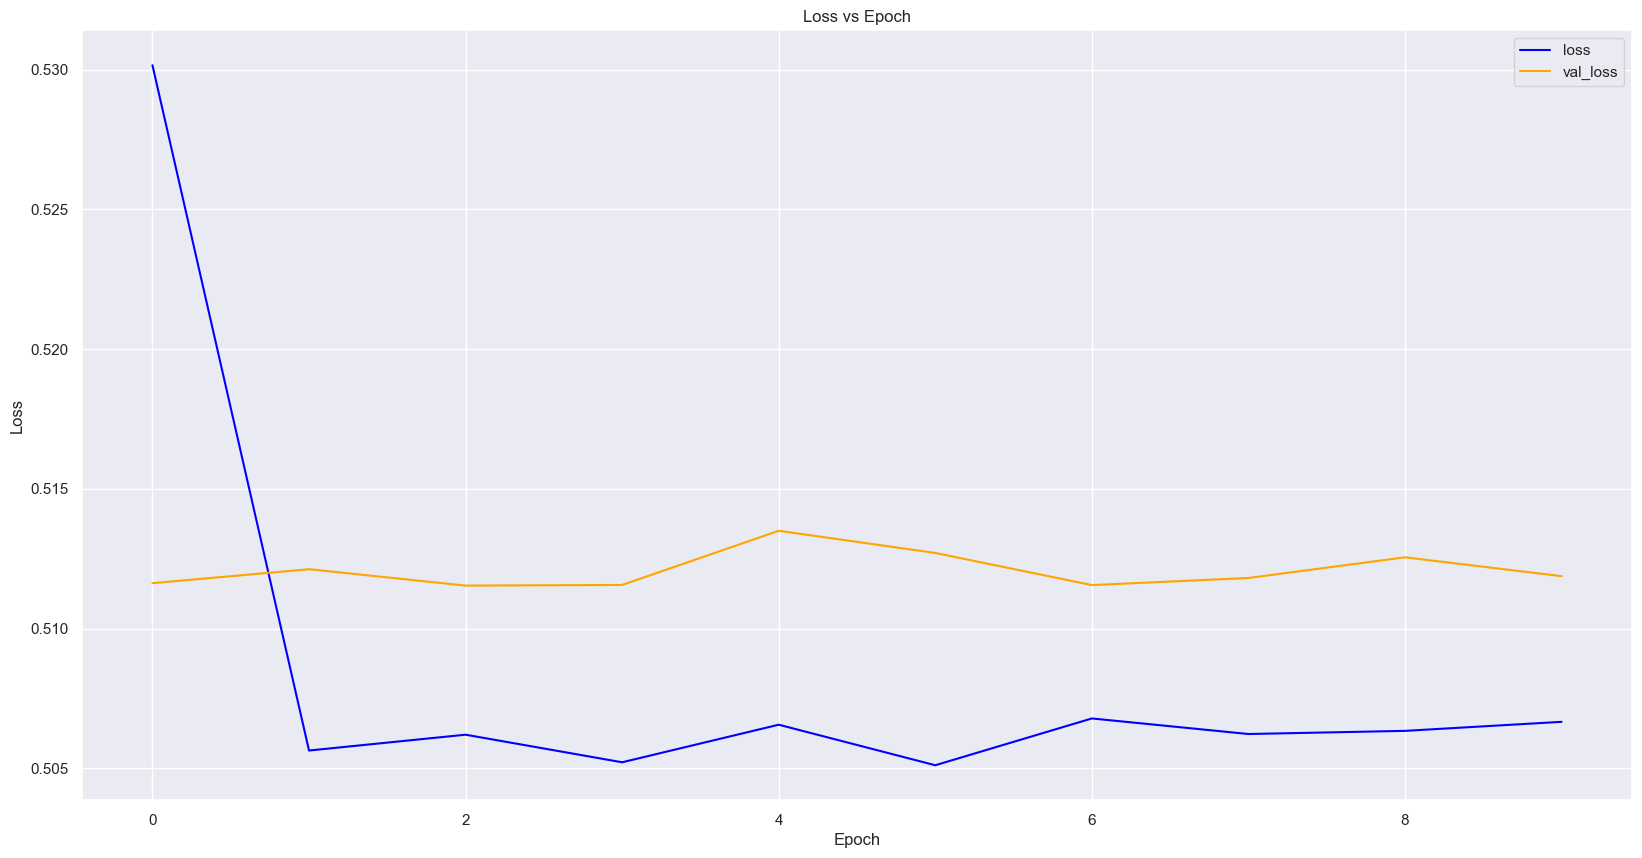

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8108 - loss: 0.4852
Test Loss: 0.4811097979545593
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7930 - loss: 0.5110 - val_accuracy: 0.7961 - val_loss: 0.5140
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7926 - loss: 0.5114 - val_accuracy: 0.7961 - val_loss: 0.5125
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7901 - loss: 0.5145 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7969 - loss: 0.5054 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7935 - loss: 0.5098 - val_a

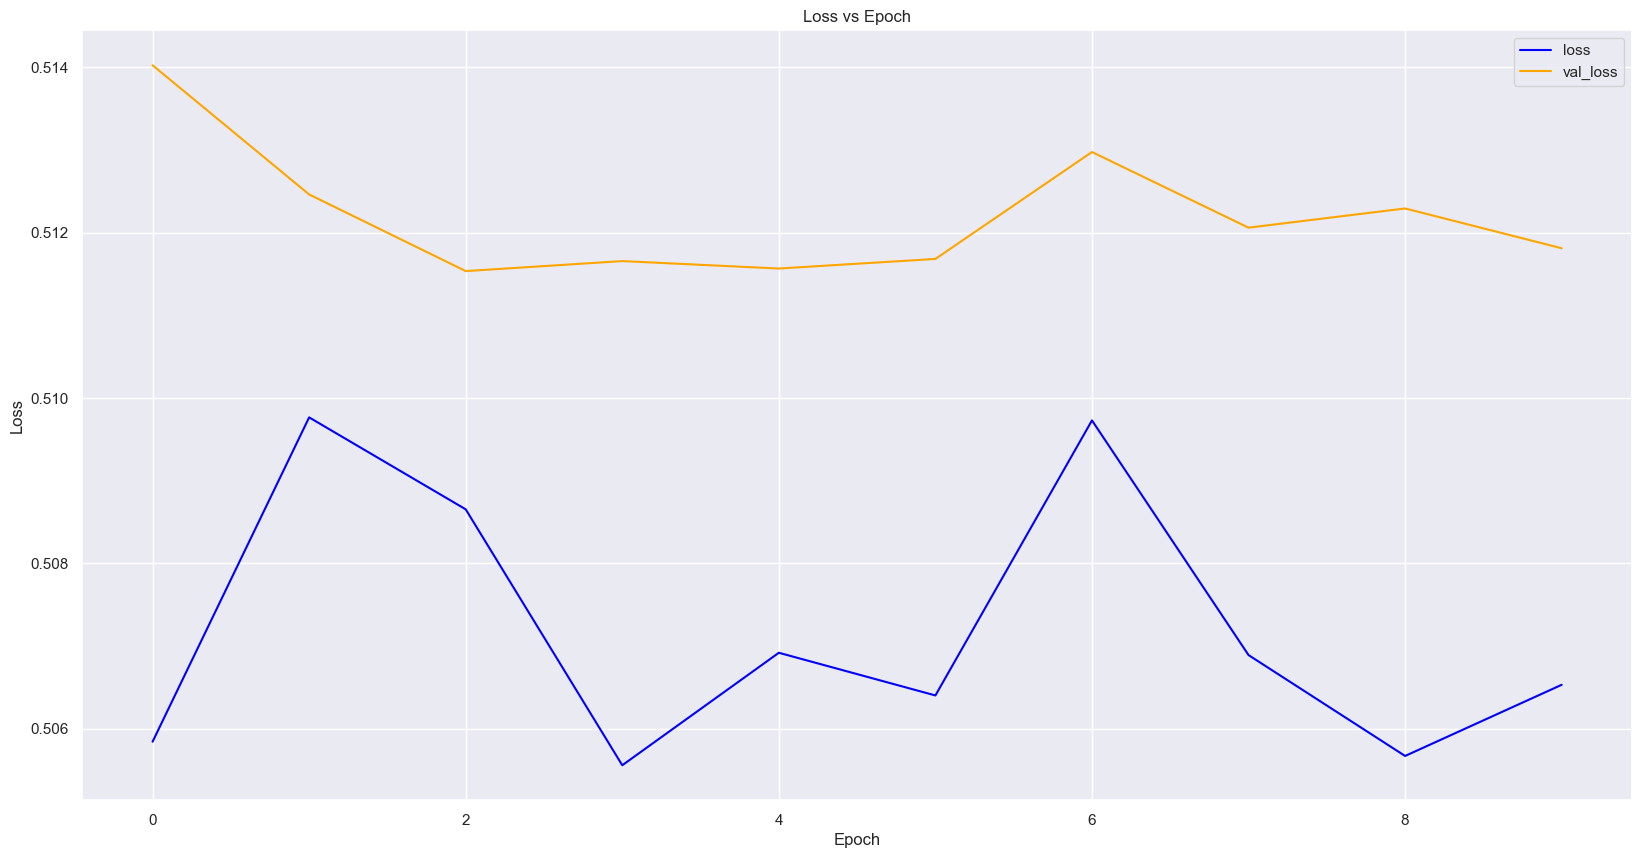

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8108 - loss: 0.4875
Test Loss: 0.48375701904296875
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.8023 - loss: 0.4978 - val_accuracy: 0.7961 - val_loss: 0.5118
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.7926 - loss: 0.5106 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8063 - loss: 0.4919 - val_accuracy: 0.7961 - val_loss: 0.5126
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8005 - loss: 0.5014 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7897 - loss: 0.5150 - val_

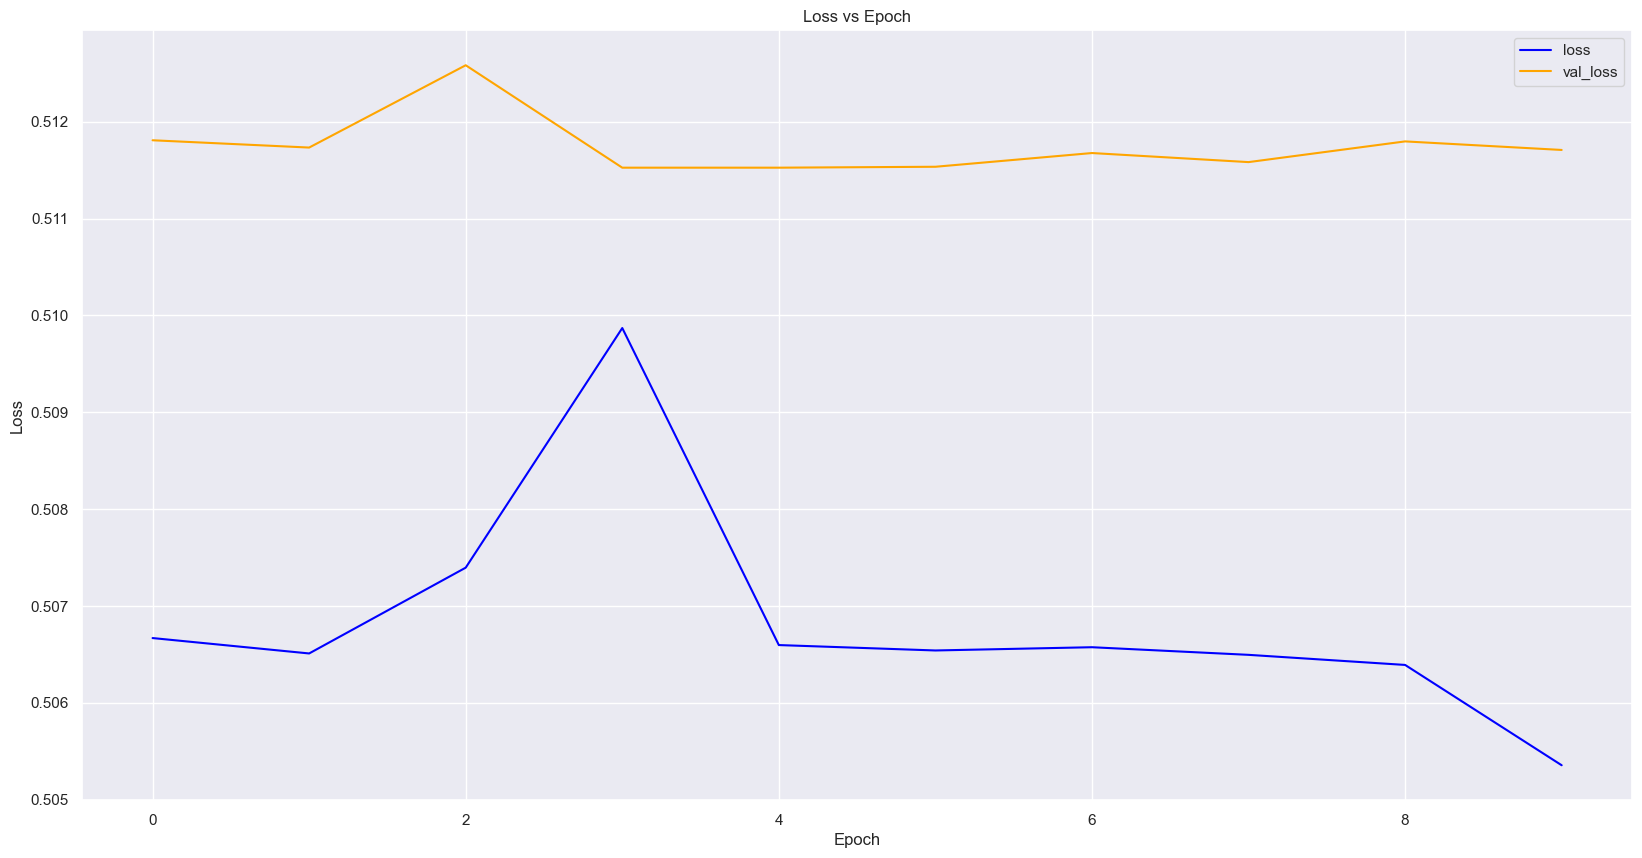

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8108 - loss: 0.4854
Test Loss: 0.48132744431495667
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7924 - loss: 0.5110 - val_accuracy: 0.7961 - val_loss: 0.5114
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7944 - loss: 0.5076 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.7952 - loss: 0.5070 - val_accuracy: 0.7961 - val_loss: 0.5113
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.7913 - loss: 0.5123 - val_accuracy: 0.7961 - val_loss: 0.5114
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.7885 - loss: 0.5164 - val

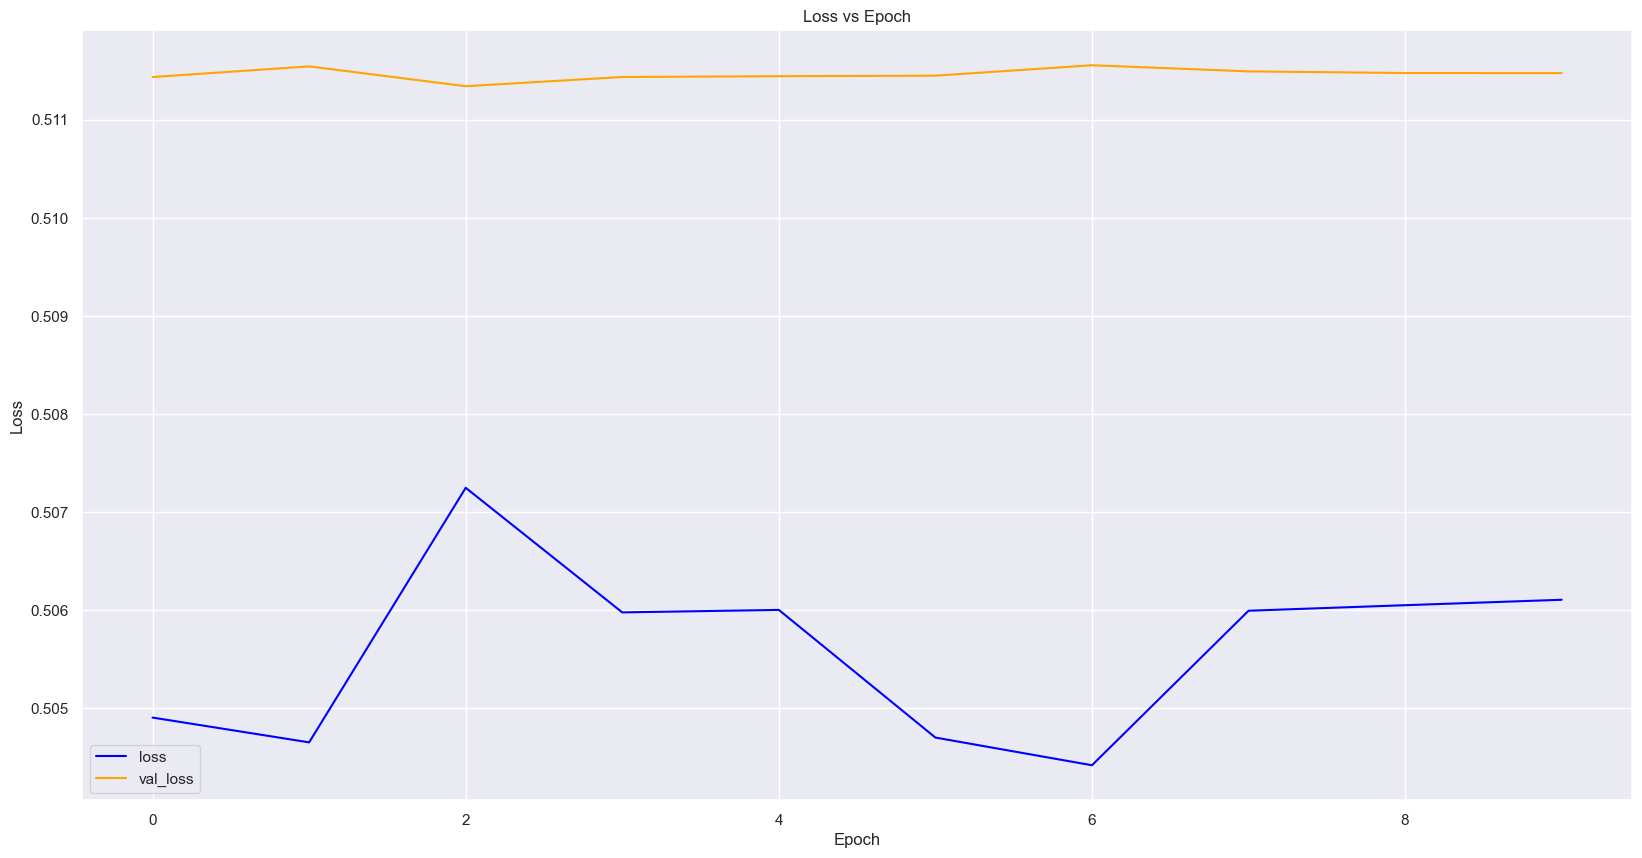

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8108 - loss: 0.4894
Test Loss: 0.48287439346313477
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7957 - loss: 0.5067 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.7999 - loss: 0.5007 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8050 - loss: 0.4936 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.7975 - loss: 0.5038 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7935 - loss: 0.5094 - val

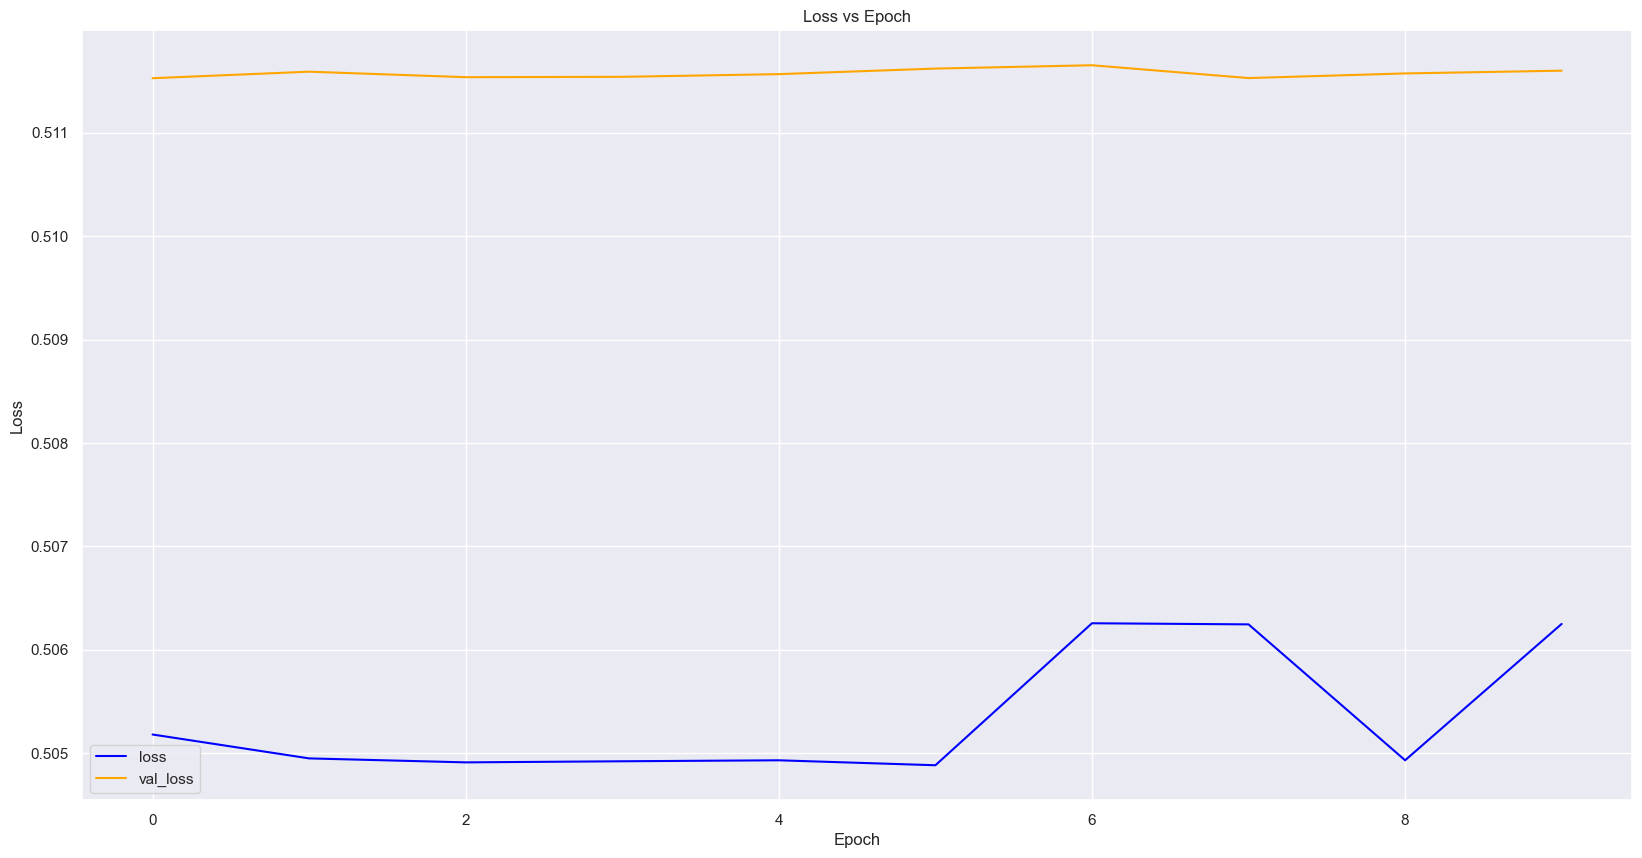

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8108 - loss: 0.4856
Test Loss: 0.4815945029258728
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  10
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.7973 - loss: 0.5041 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.7939 - loss: 0.5088 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8049 - loss: 0.4938 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8001 - loss: 0.5004 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8014 - loss: 0.4986 - val_

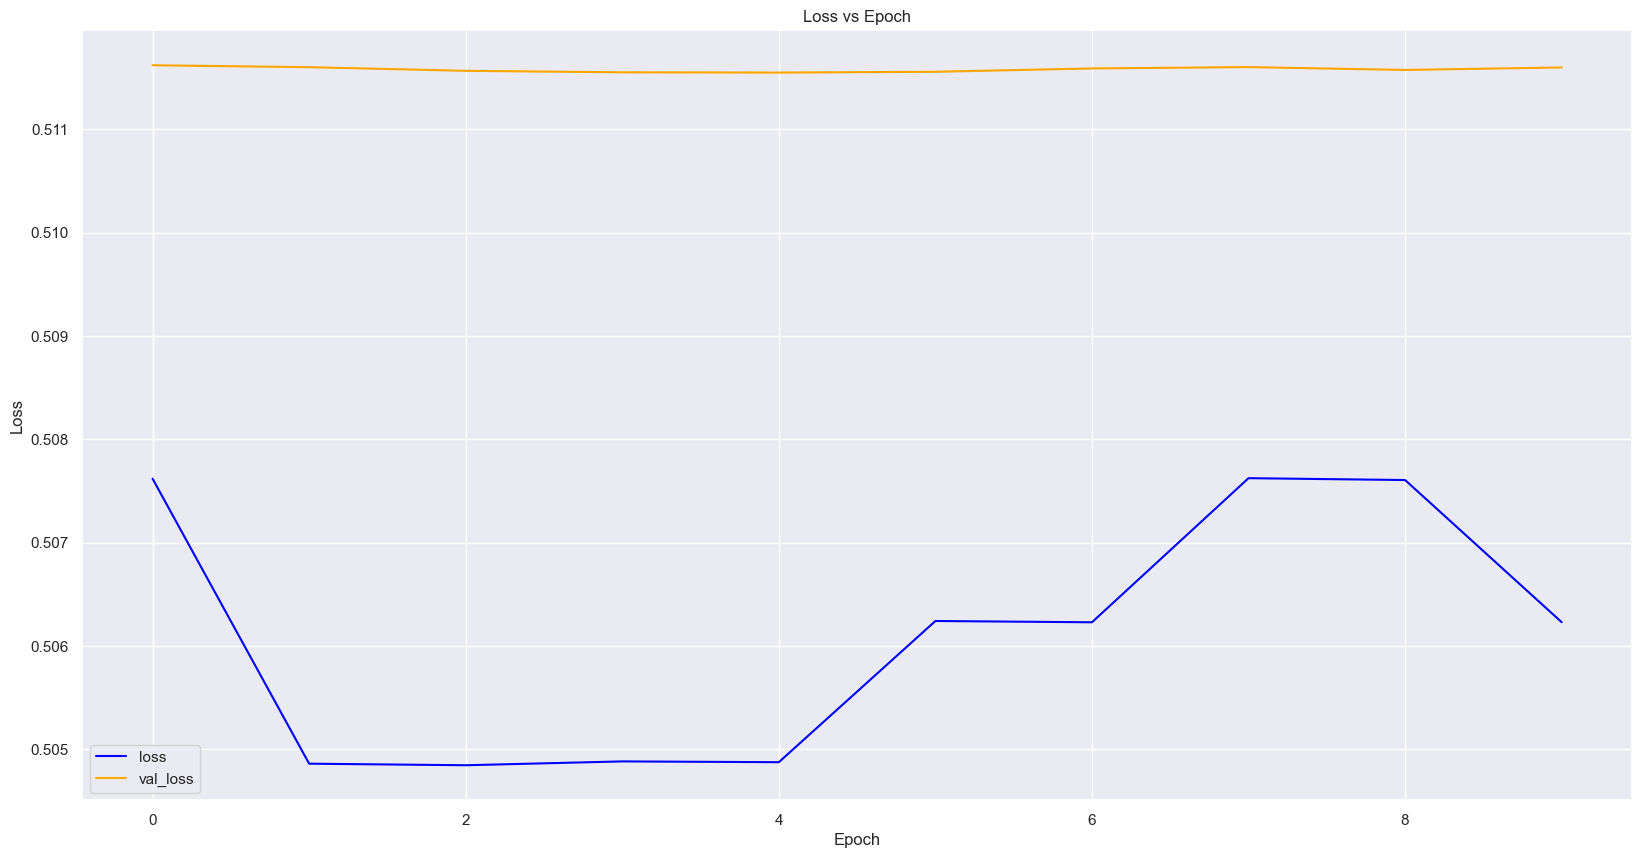

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8108 - loss: 0.4857
Test Loss: 0.4816001057624817
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8017 - loss: 0.6720 - val_accuracy: 0.7961 - val_loss: 0.5197
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.7911 - loss: 0.5178 - val_accuracy: 0.7961 - val_loss: 0.5181
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7877 - loss: 0.5195 - val_accuracy: 0.7961 - val_loss: 0.5148
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.7961 - loss: 0.5108 - val_accuracy: 0.7961 - val_loss: 0.5160
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7966 - loss: 0.5124 - val_ac

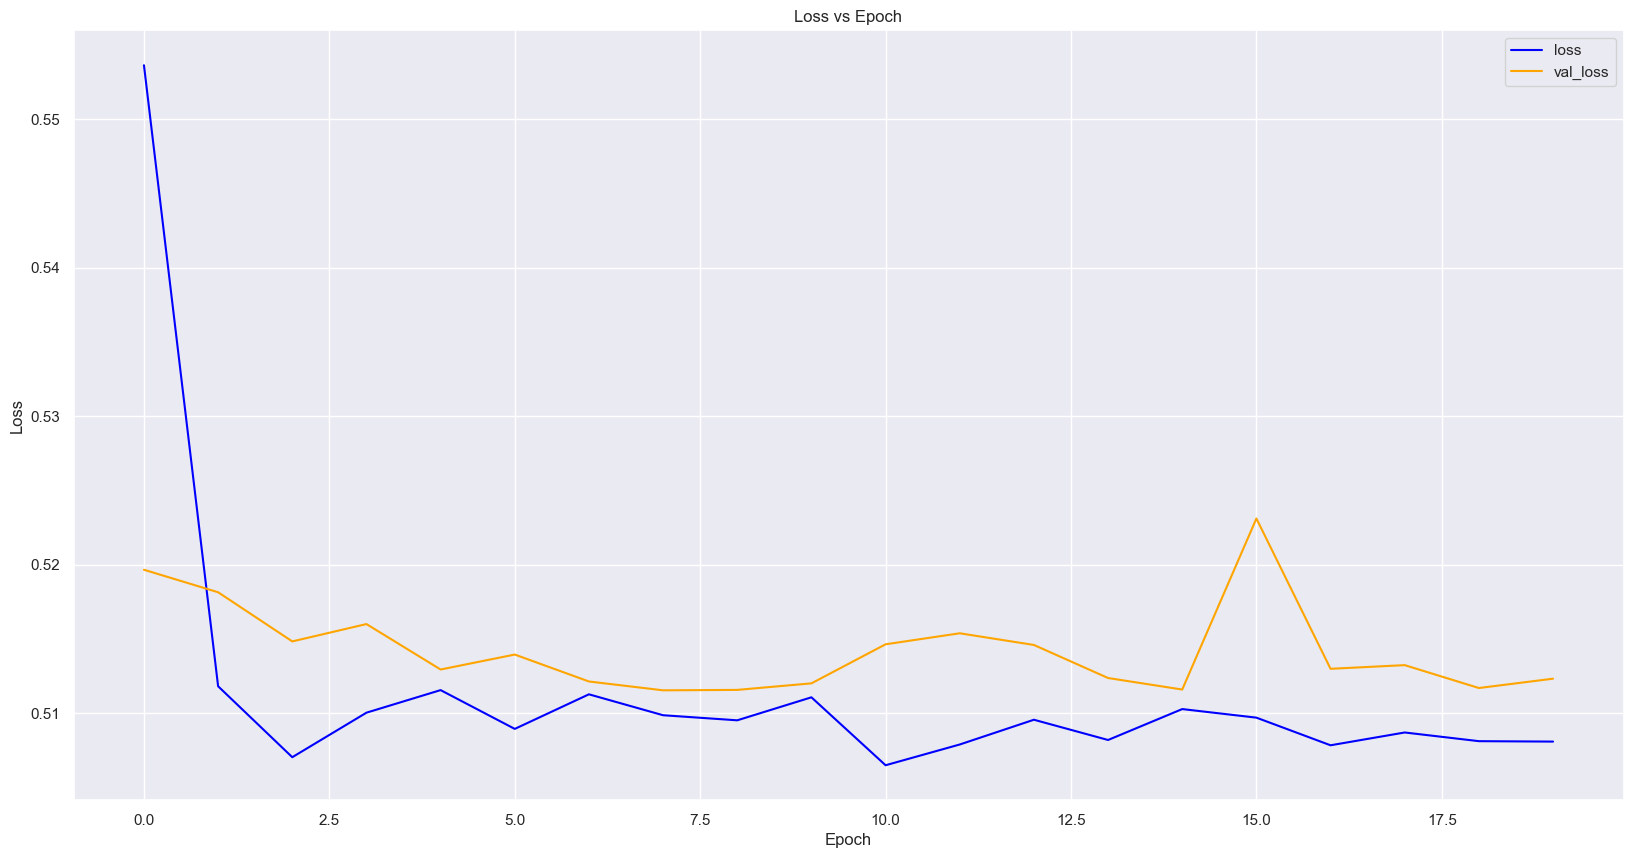

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8108 - loss: 0.4888
Test Loss: 0.4850907325744629
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7973 - loss: 0.5088 - val_accuracy: 0.7961 - val_loss: 0.5128
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7936 - loss: 0.5111 - val_accuracy: 0.7961 - val_loss: 0.5122
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7992 - loss: 0.5050 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7896 - loss: 0.5193 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7998 - loss: 0.5060 - val_ac

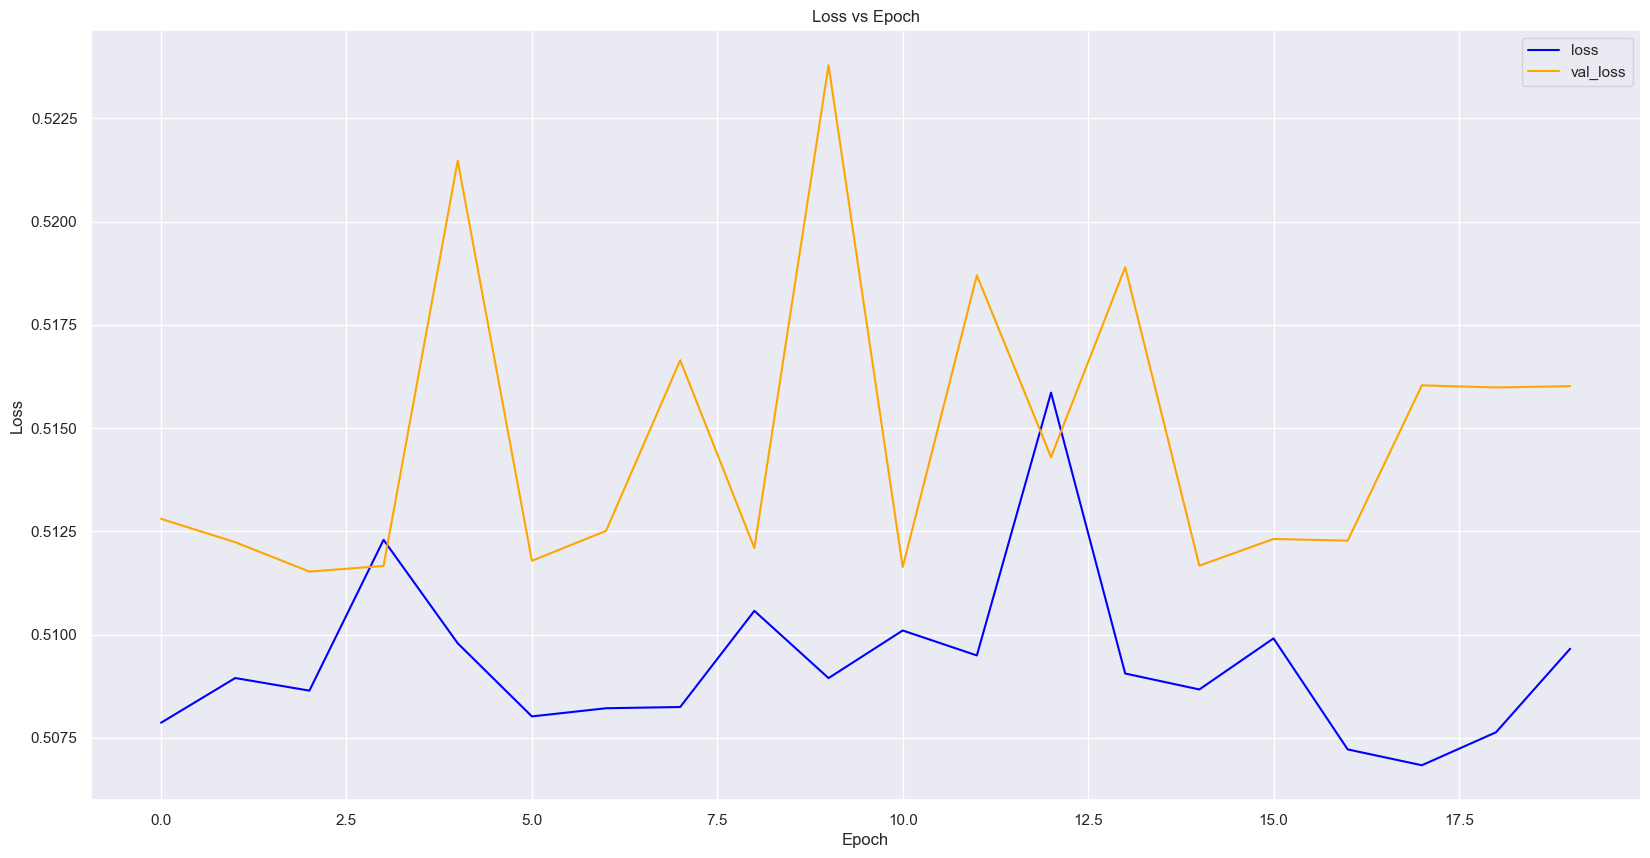

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8108 - loss: 0.4861
Test Loss: 0.48142534494400024
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7939 - loss: 0.5128 - val_accuracy: 0.7961 - val_loss: 0.5135
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8019 - loss: 0.5023 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7894 - loss: 0.5192 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7971 - loss: 0.5072 - val_accuracy: 0.7961 - val_loss: 0.5220
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7951 - loss: 0.5129 - val_a

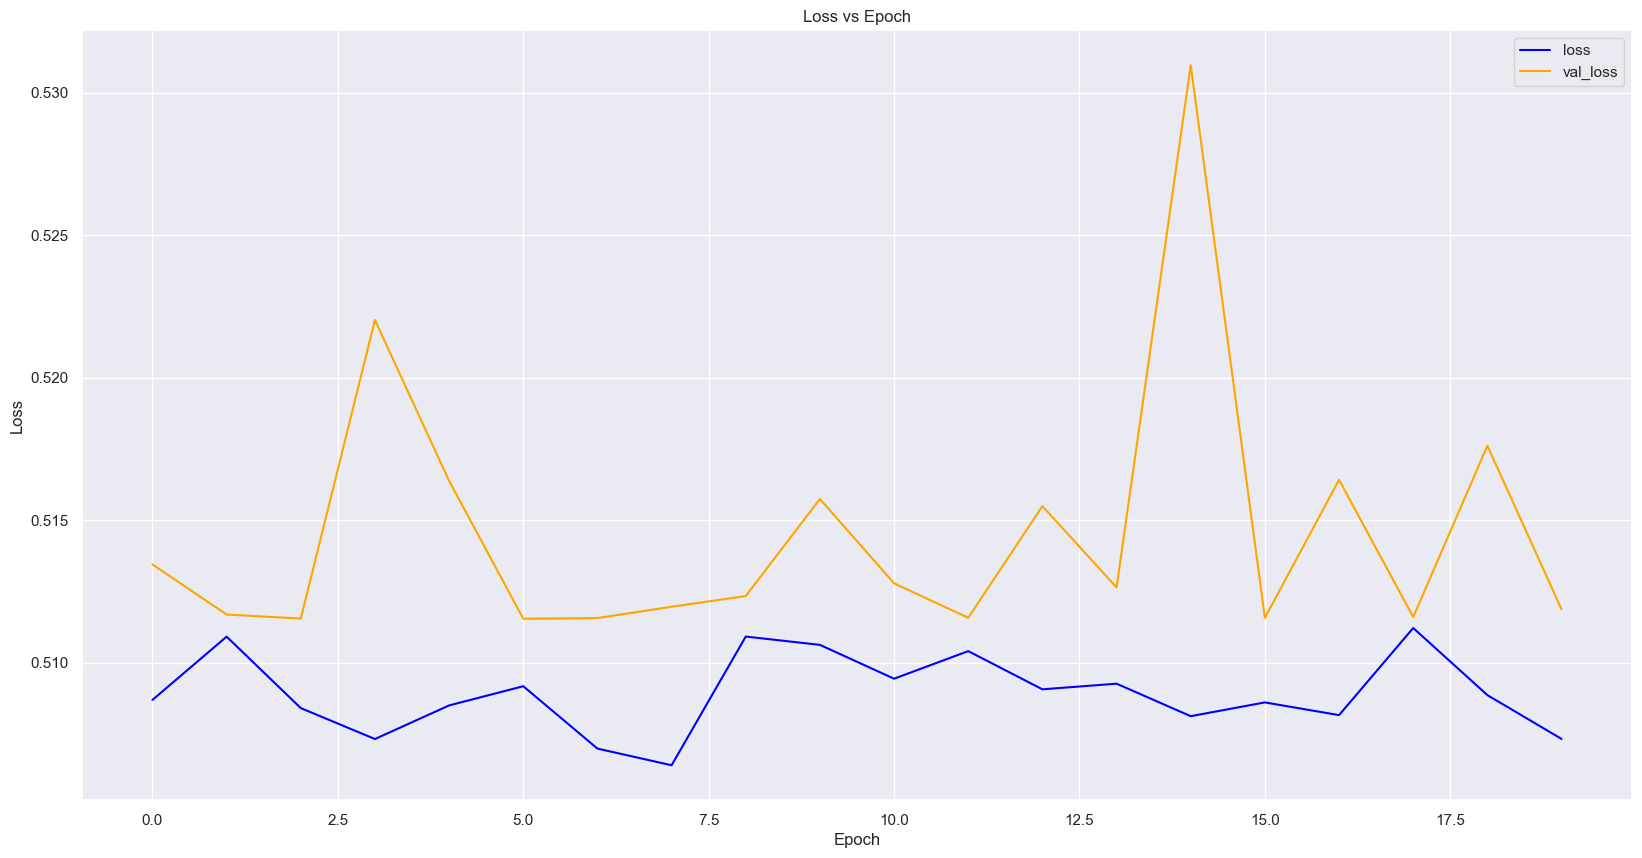

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8108 - loss: 0.4853
Test Loss: 0.4810943901538849
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8021 - loss: 0.4980 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.7962 - loss: 0.5061 - val_accuracy: 0.7961 - val_loss: 0.5128
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7982 - loss: 0.5030 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8016 - loss: 0.4986 - val_accuracy: 0.7961 - val_loss: 0.5118
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8031 - loss: 0.4974 - val_a

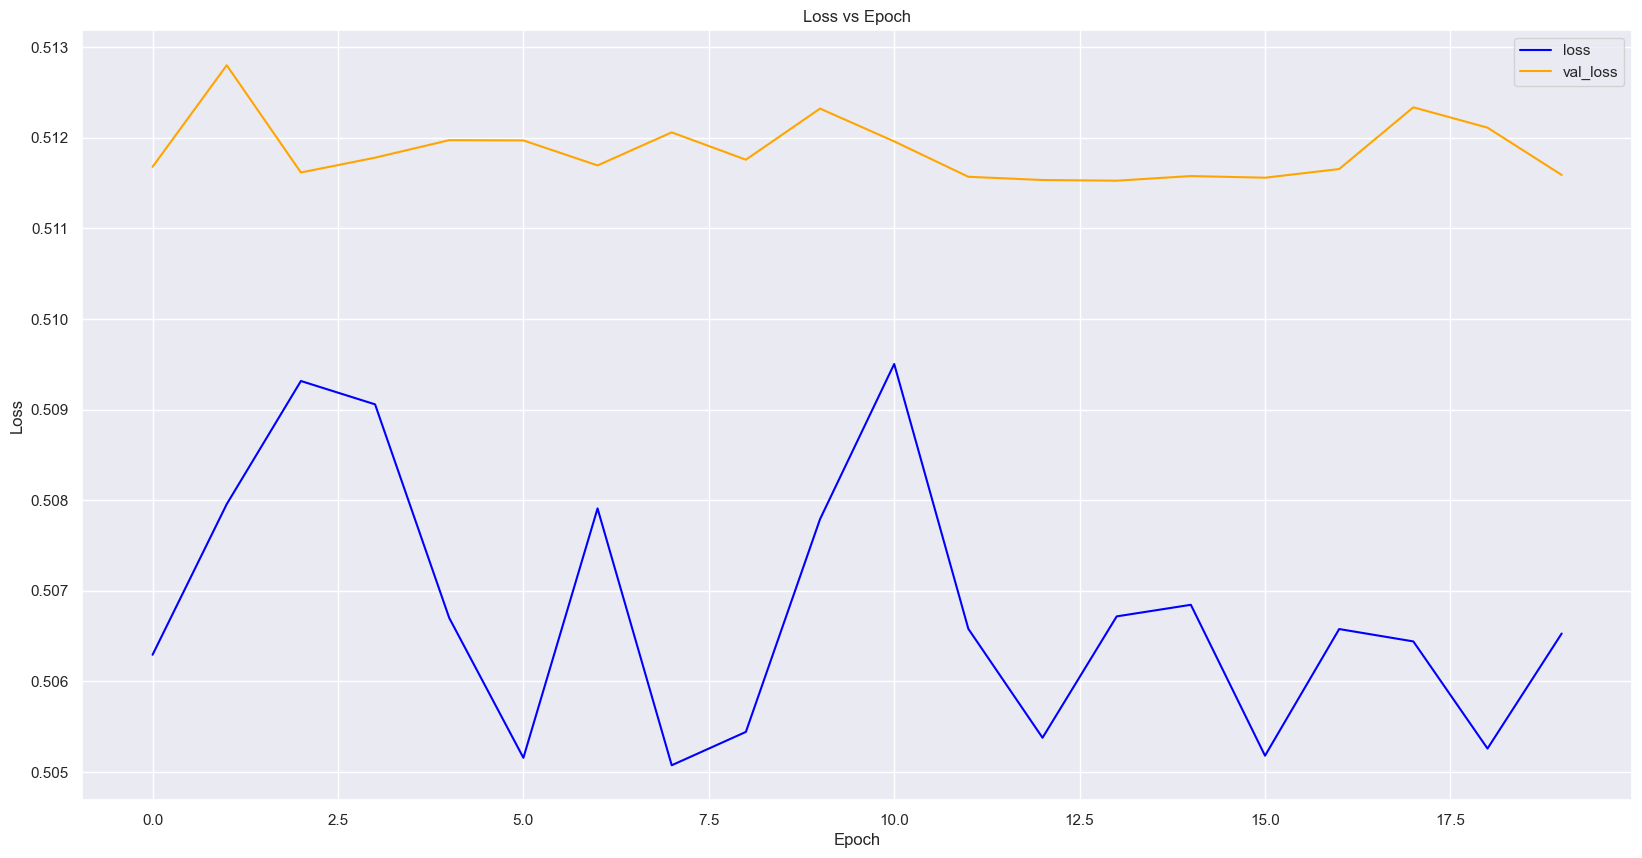

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8108 - loss: 0.4867
Test Loss: 0.48286163806915283
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.7896 - loss: 0.5169 - val_accuracy: 0.7961 - val_loss: 0.5121
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7997 - loss: 0.5011 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7851 - loss: 0.5208 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7918 - loss: 0.5118 - val_accuracy: 0.7961 - val_loss: 0.5119
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7957 - loss: 0.5065 - val_

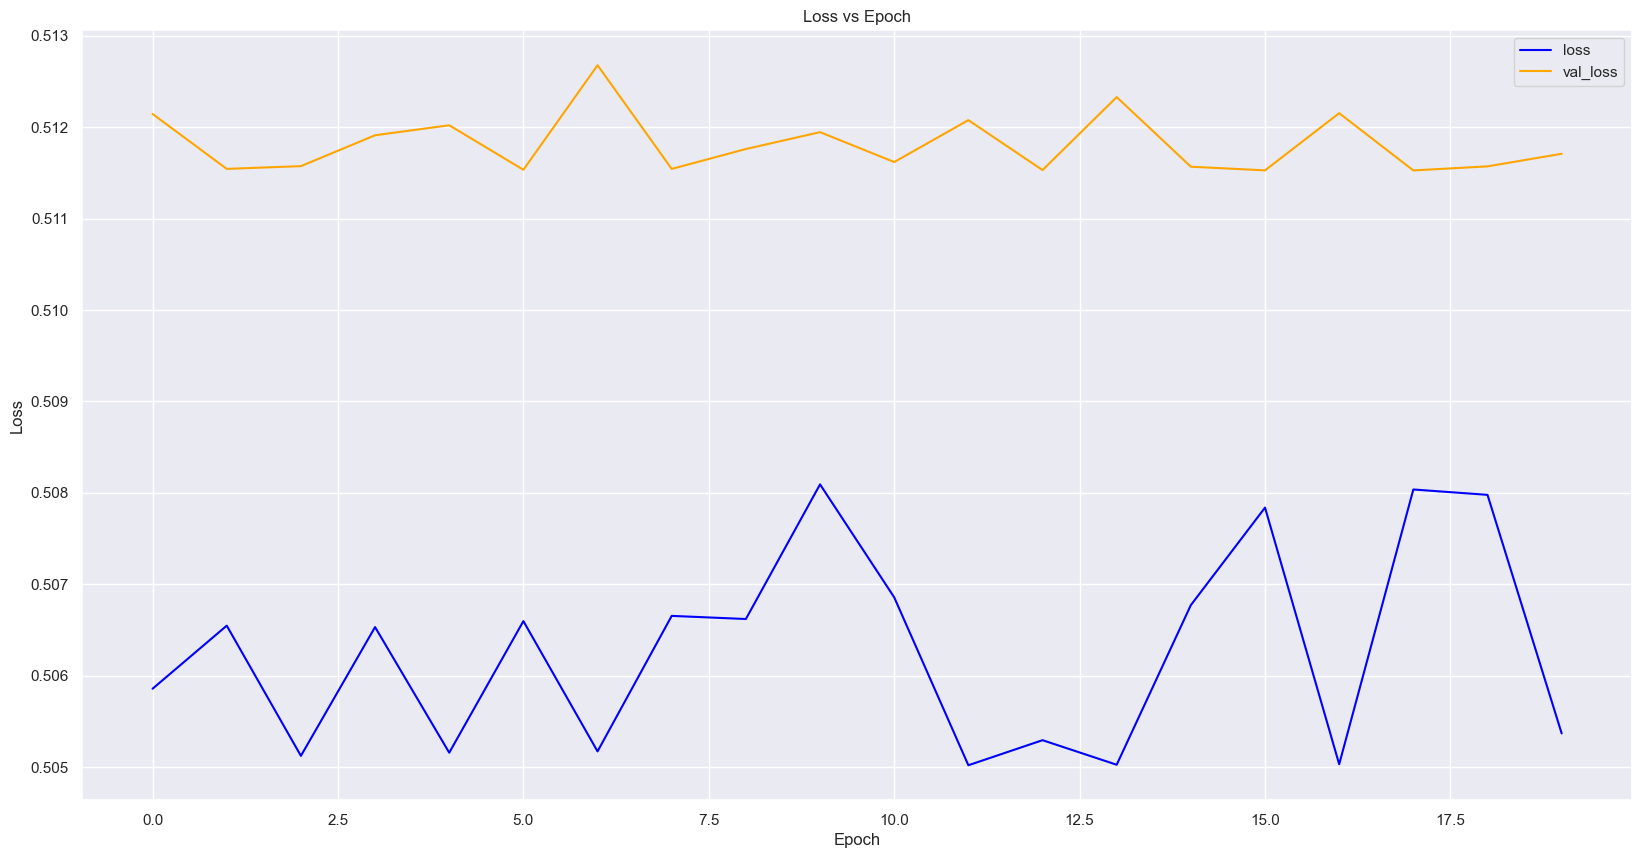

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8108 - loss: 0.4854
Test Loss: 0.4813285768032074
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7918 - loss: 0.5121 - val_accuracy: 0.7961 - val_loss: 0.5118
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7981 - loss: 0.5037 - val_accuracy: 0.7961 - val_loss: 0.5122
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7946 - loss: 0.5087 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8006 - loss: 0.5001 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7933 - loss: 0.5099 - val_a

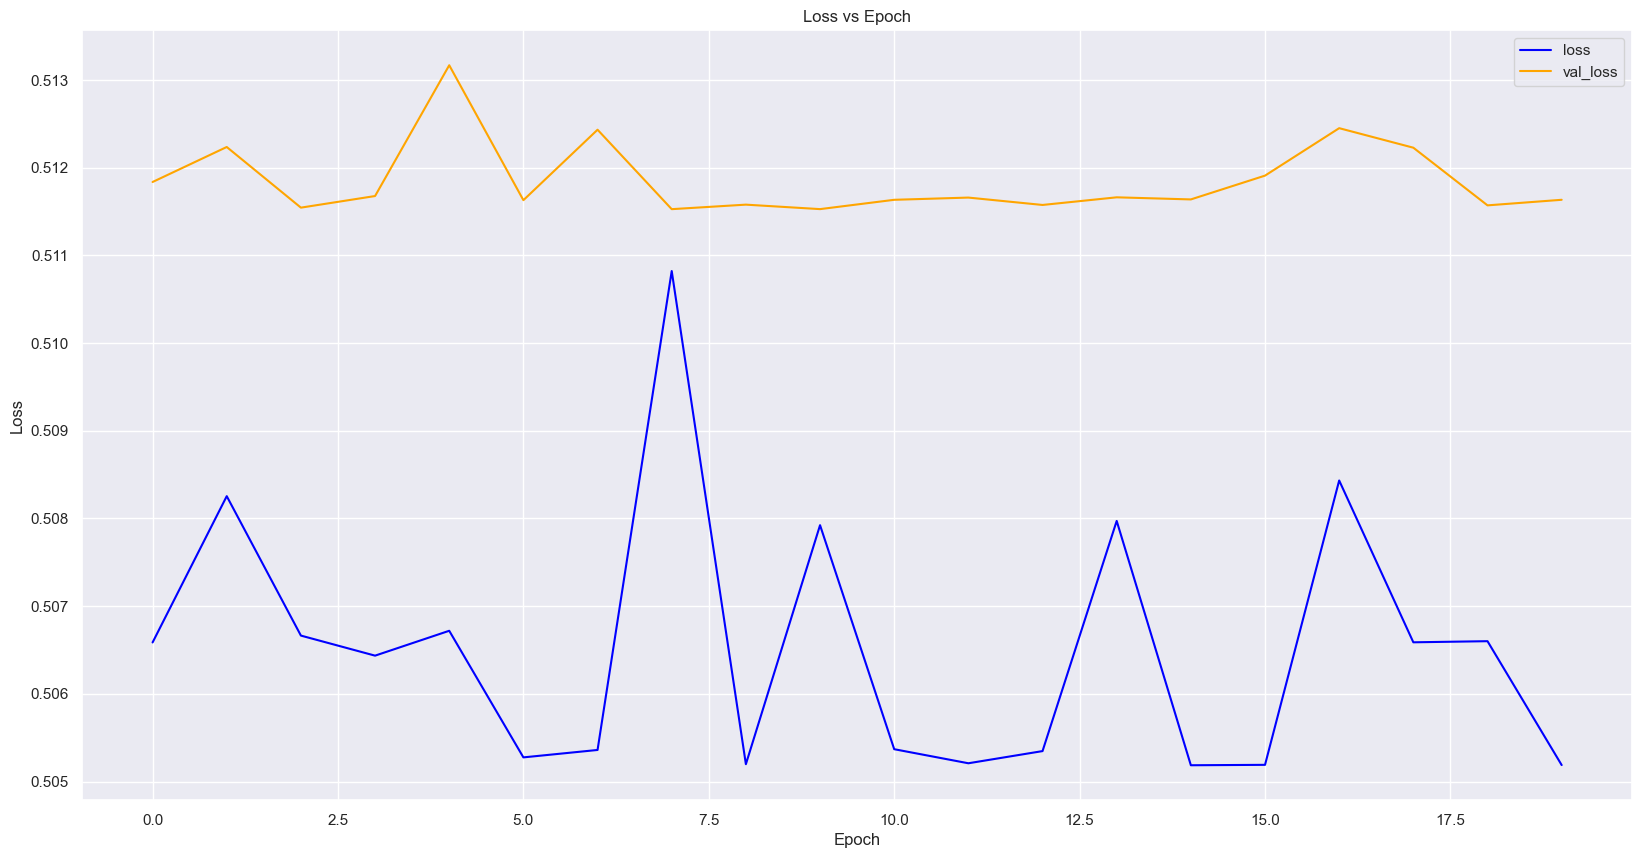

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8108 - loss: 0.4856
Test Loss: 0.48149460554122925
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.7967 - loss: 0.5052 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8014 - loss: 0.4987 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.7923 - loss: 0.5110 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.7936 - loss: 0.5091 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8055 - loss: 0.4930 - val

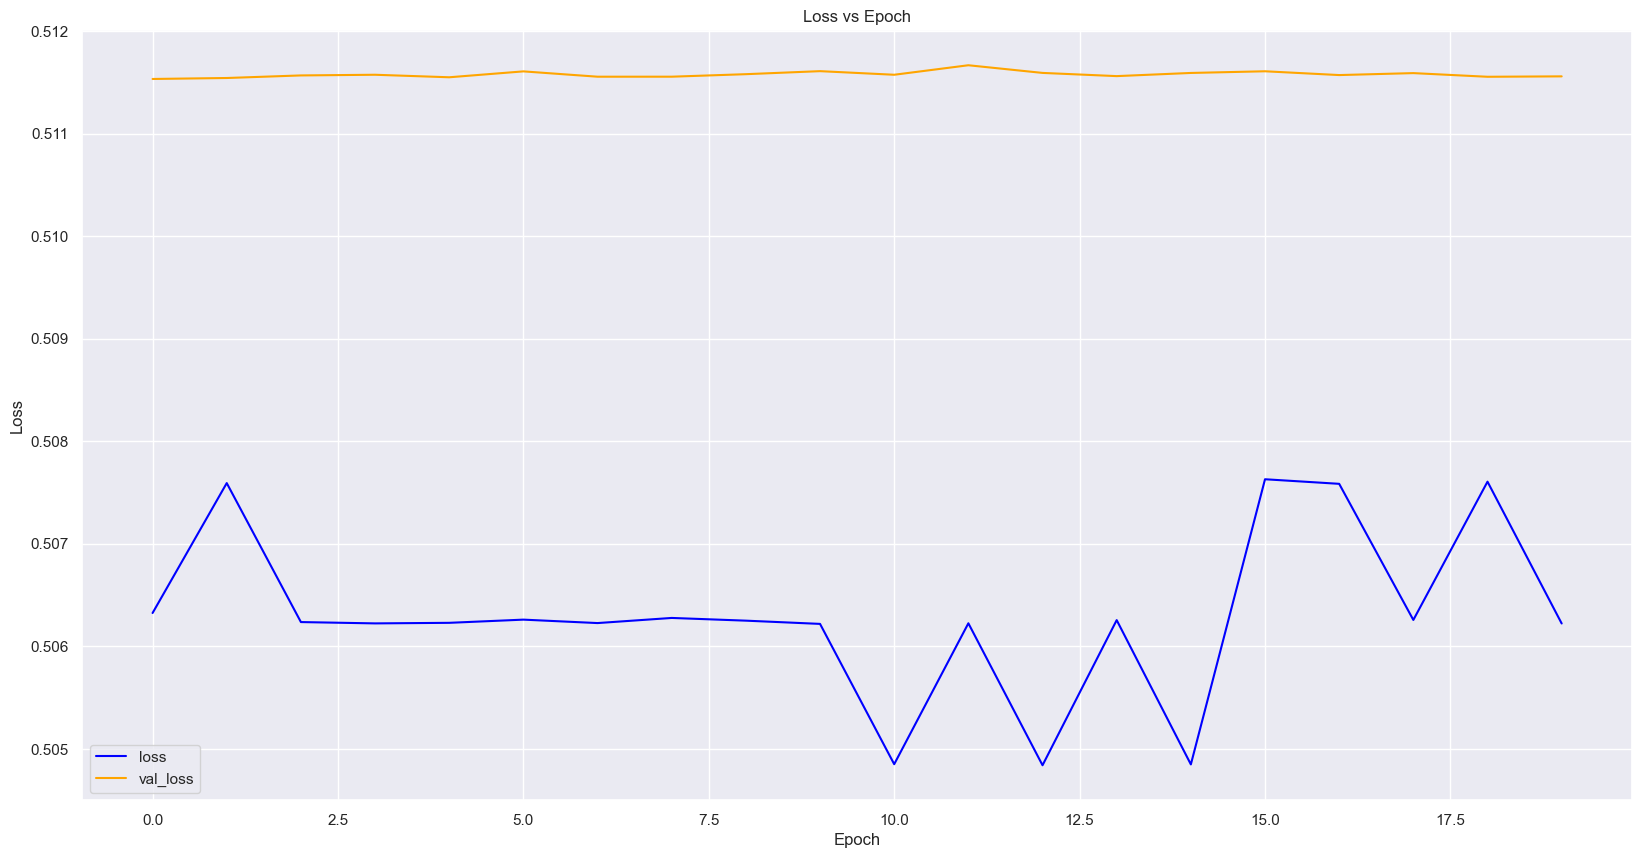

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8108 - loss: 0.4858
Test Loss: 0.48178279399871826
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7891 - loss: 0.5155 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7941 - loss: 0.5085 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7945 - loss: 0.5080 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7987 - loss: 0.5022 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8059 - loss: 0.4924 - val

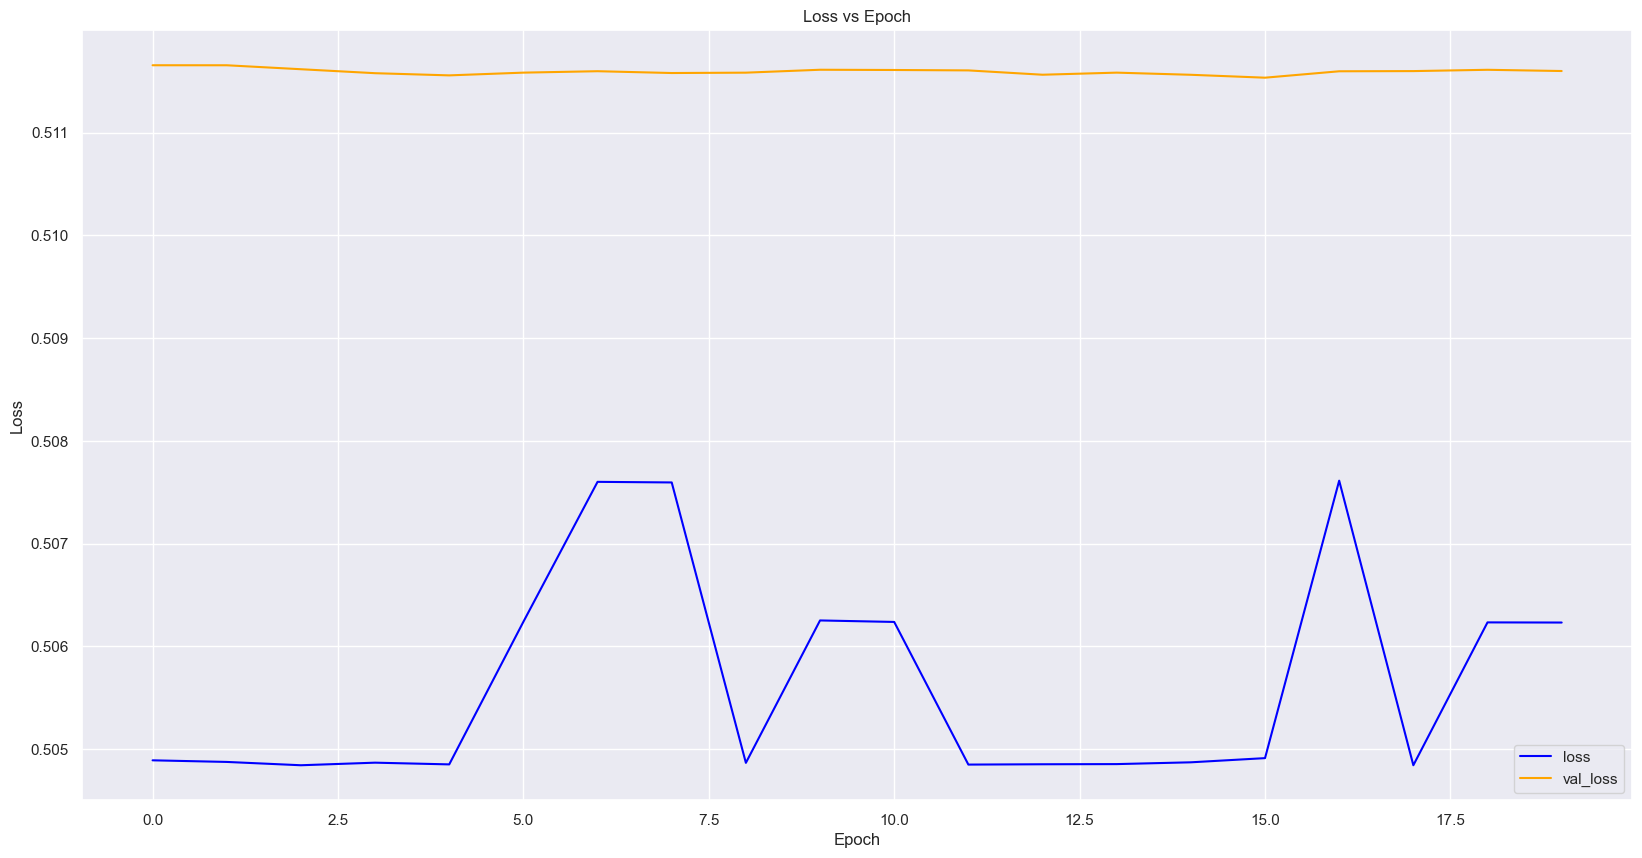

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8108 - loss: 0.4856
Test Loss: 0.48159757256507874
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  20
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.7885 - loss: 0.5162 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7998 - loss: 0.5007 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7959 - loss: 0.5061 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7939 - loss: 0.5089 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7950 - loss: 0.5074 - val

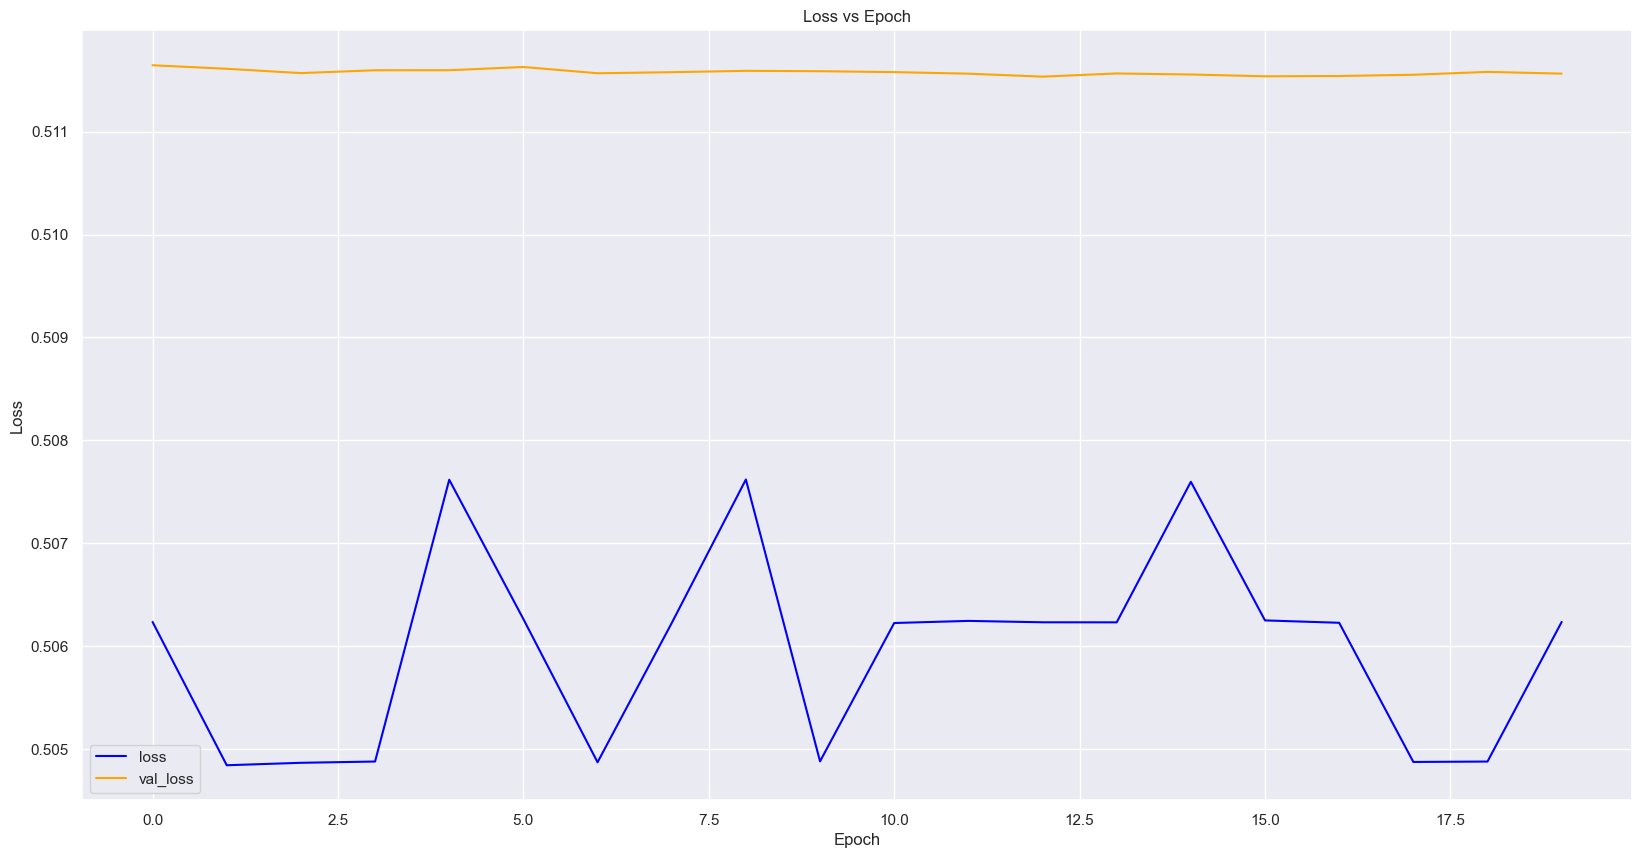

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8108 - loss: 0.4858
Test Loss: 0.4817492961883545
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8014 - loss: 0.5032 - val_accuracy: 0.7961 - val_loss: 0.5120
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.7957 - loss: 0.5087 - val_accuracy: 0.7961 - val_loss: 0.5294
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7964 - loss: 0.5119 - val_accuracy: 0.7961 - val_loss: 0.5136
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7946 - loss: 0.5109 - val_accuracy: 0.7961 - val_loss: 0.5148
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8019 - loss: 0.5005 - val_ac

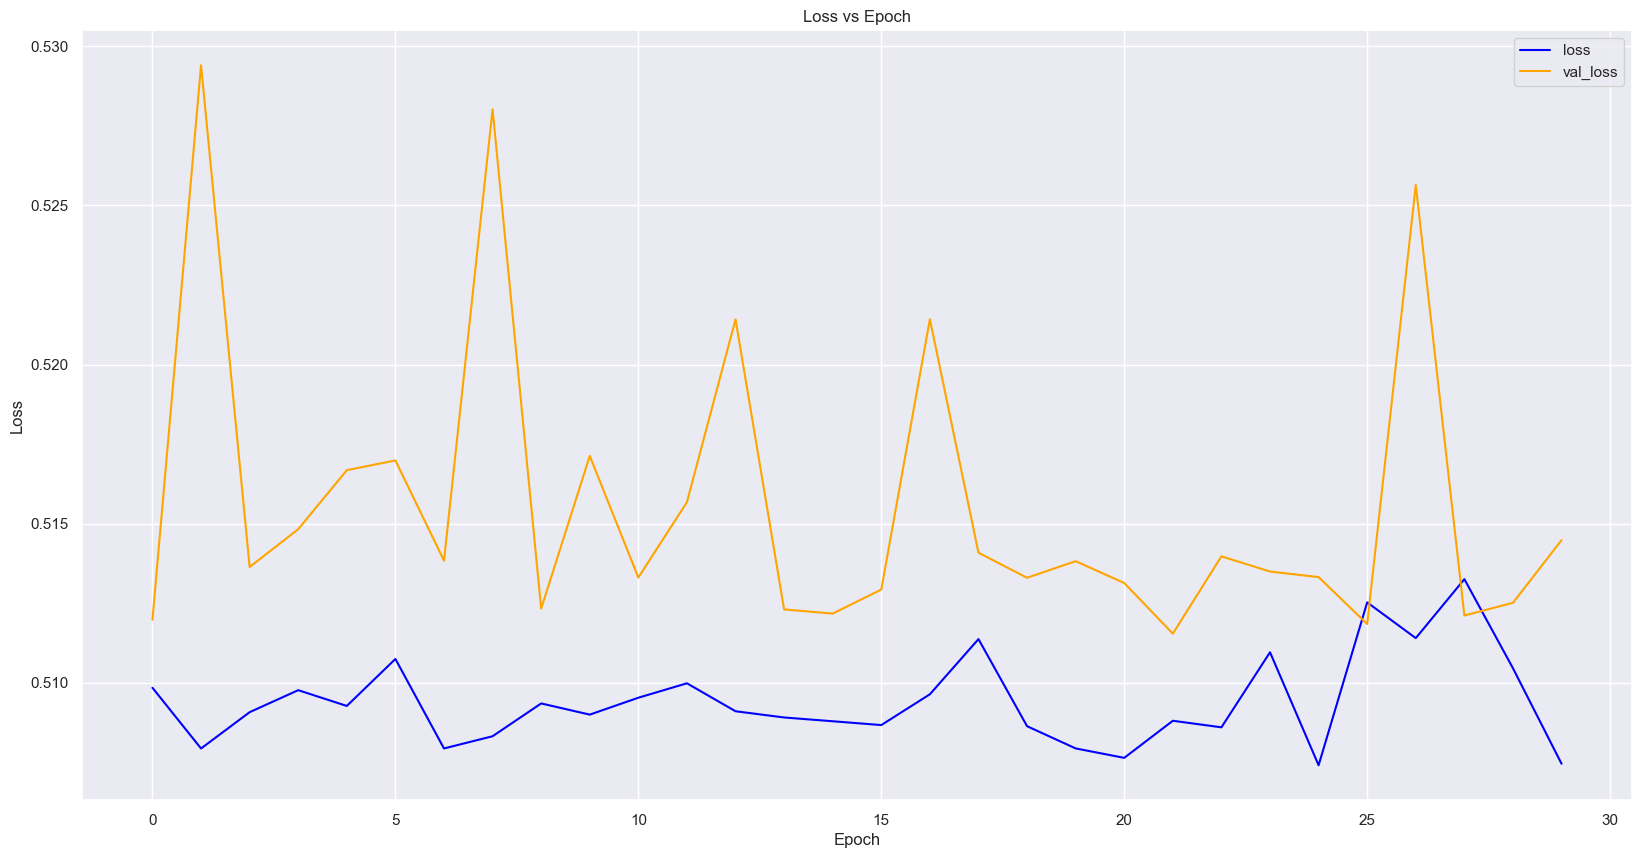

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8108 - loss: 0.4854
Test Loss: 0.4808999001979828
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7903 - loss: 0.5213 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7991 - loss: 0.5079 - val_accuracy: 0.7961 - val_loss: 0.5150
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7886 - loss: 0.5181 - val_accuracy: 0.7961 - val_loss: 0.5120
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7955 - loss: 0.5082 - val_accuracy: 0.7961 - val_loss: 0.5126
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7917 - loss: 0.5138 - val_ac

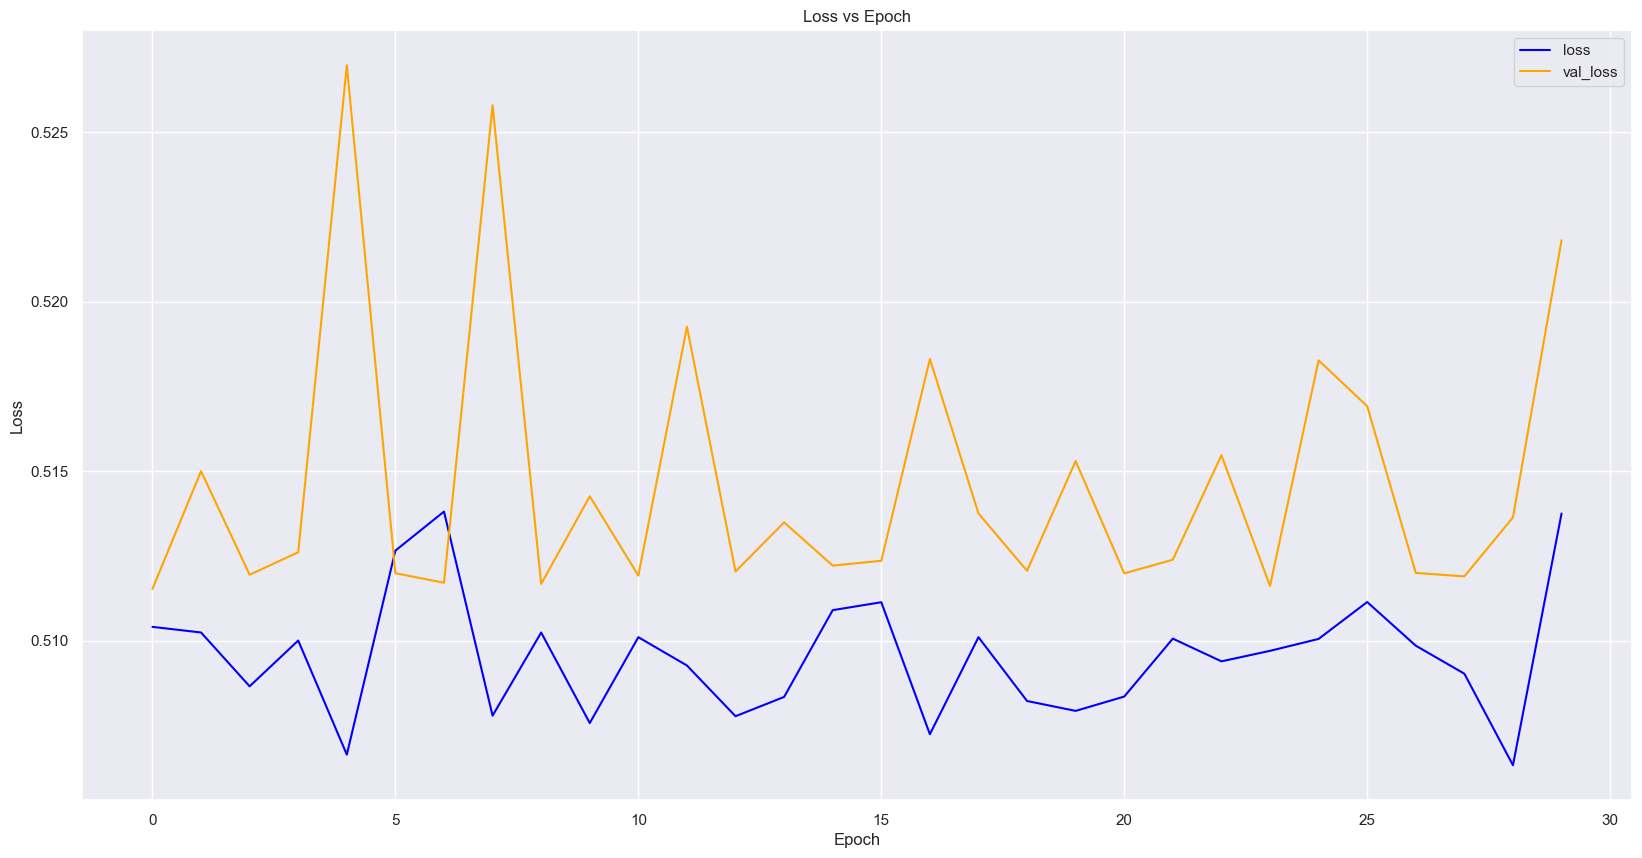

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8108 - loss: 0.5029
Test Loss: 0.49998292326927185
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.1
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.7910 - loss: 0.5161 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7966 - loss: 0.5087 - val_accuracy: 0.7961 - val_loss: 0.5121
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7953 - loss: 0.5145 - val_accuracy: 0.7961 - val_loss: 0.5127
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.7994 - loss: 0.5037 - val_accuracy: 0.7961 - val_loss: 0.5146
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7926 - loss: 0.5163 - val_a

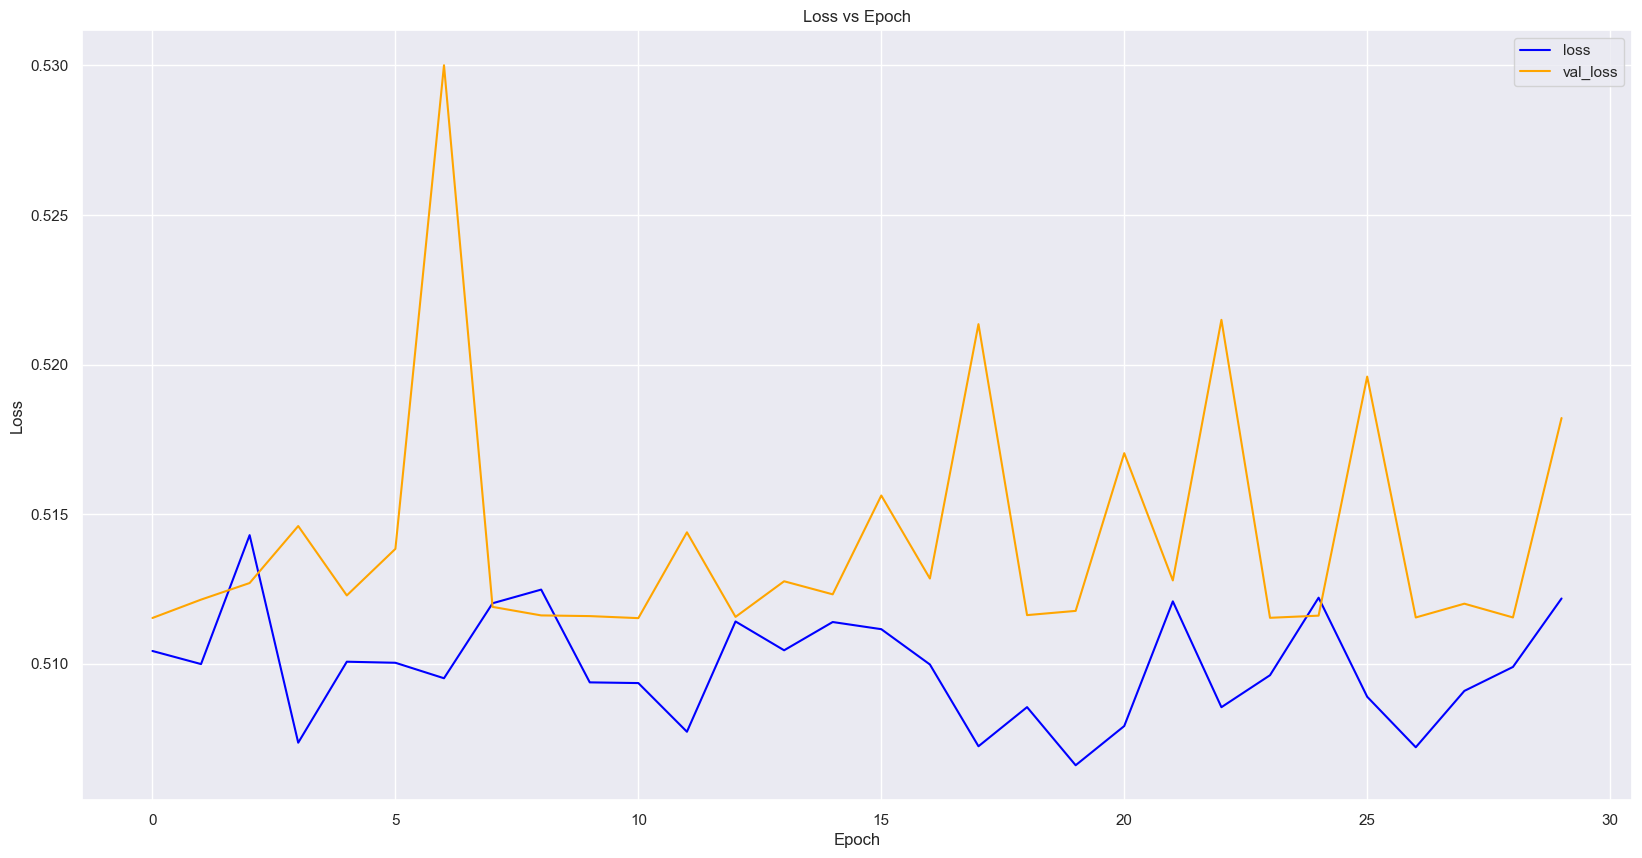

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8108 - loss: 0.4981
Test Loss: 0.49496617913246155
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7917 - loss: 0.5124 - val_accuracy: 0.7961 - val_loss: 0.5123
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7949 - loss: 0.5079 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7924 - loss: 0.5111 - val_accuracy: 0.7961 - val_loss: 0.5133
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8005 - loss: 0.4999 - val_accuracy: 0.7961 - val_loss: 0.5119
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7992 - loss: 0.5018 - val_

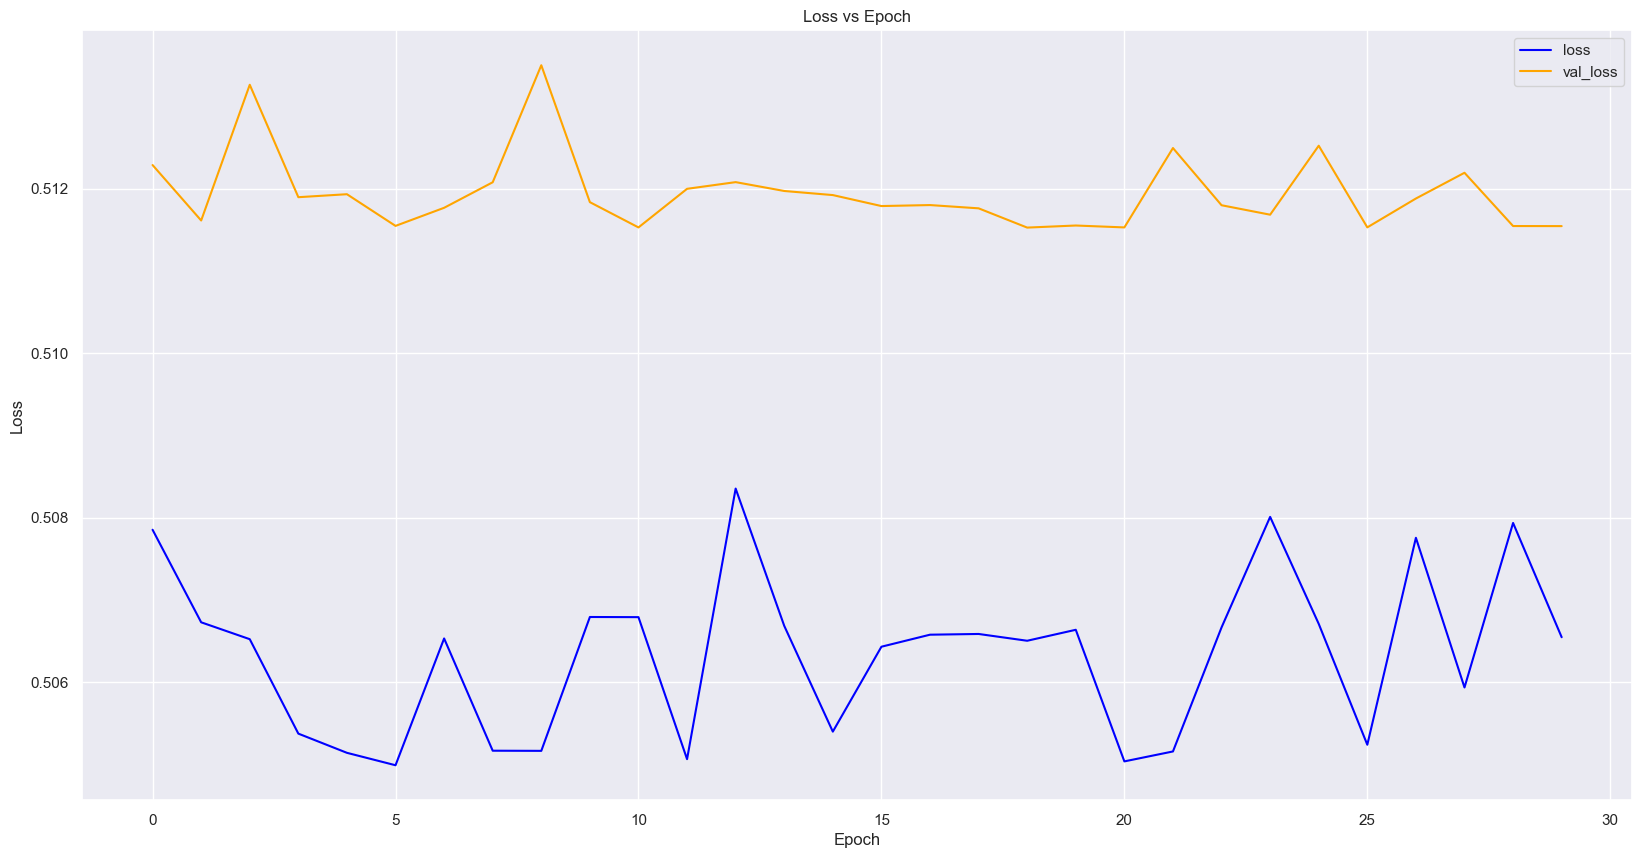

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8108 - loss: 0.4865
Test Loss: 0.48254457116127014
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7924 - loss: 0.5129 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7961 - loss: 0.5062 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7962 - loss: 0.5060 - val_accuracy: 0.7961 - val_loss: 0.5142
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7894 - loss: 0.5155 - val_accuracy: 0.7961 - val_loss: 0.5120
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8022 - loss: 0.4975 - val_

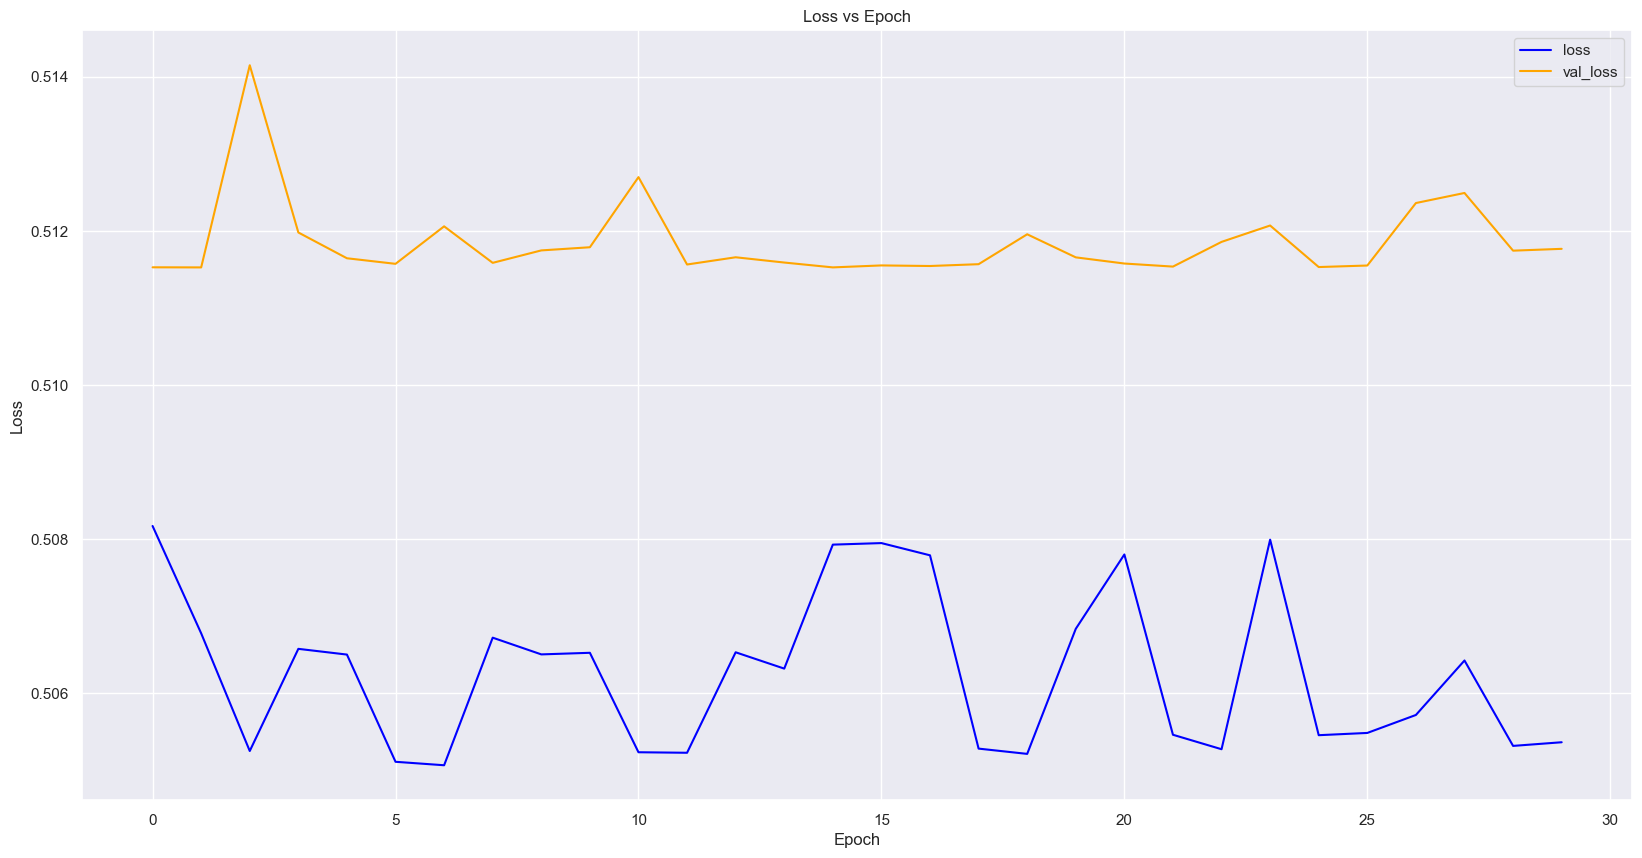

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8108 - loss: 0.4854
Test Loss: 0.481230765581131
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.01
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7919 - loss: 0.5125 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8052 - loss: 0.4933 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8084 - loss: 0.4897 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7964 - loss: 0.5059 - val_accuracy: 0.7961 - val_loss: 0.5121
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7941 - loss: 0.5091 - val_ac

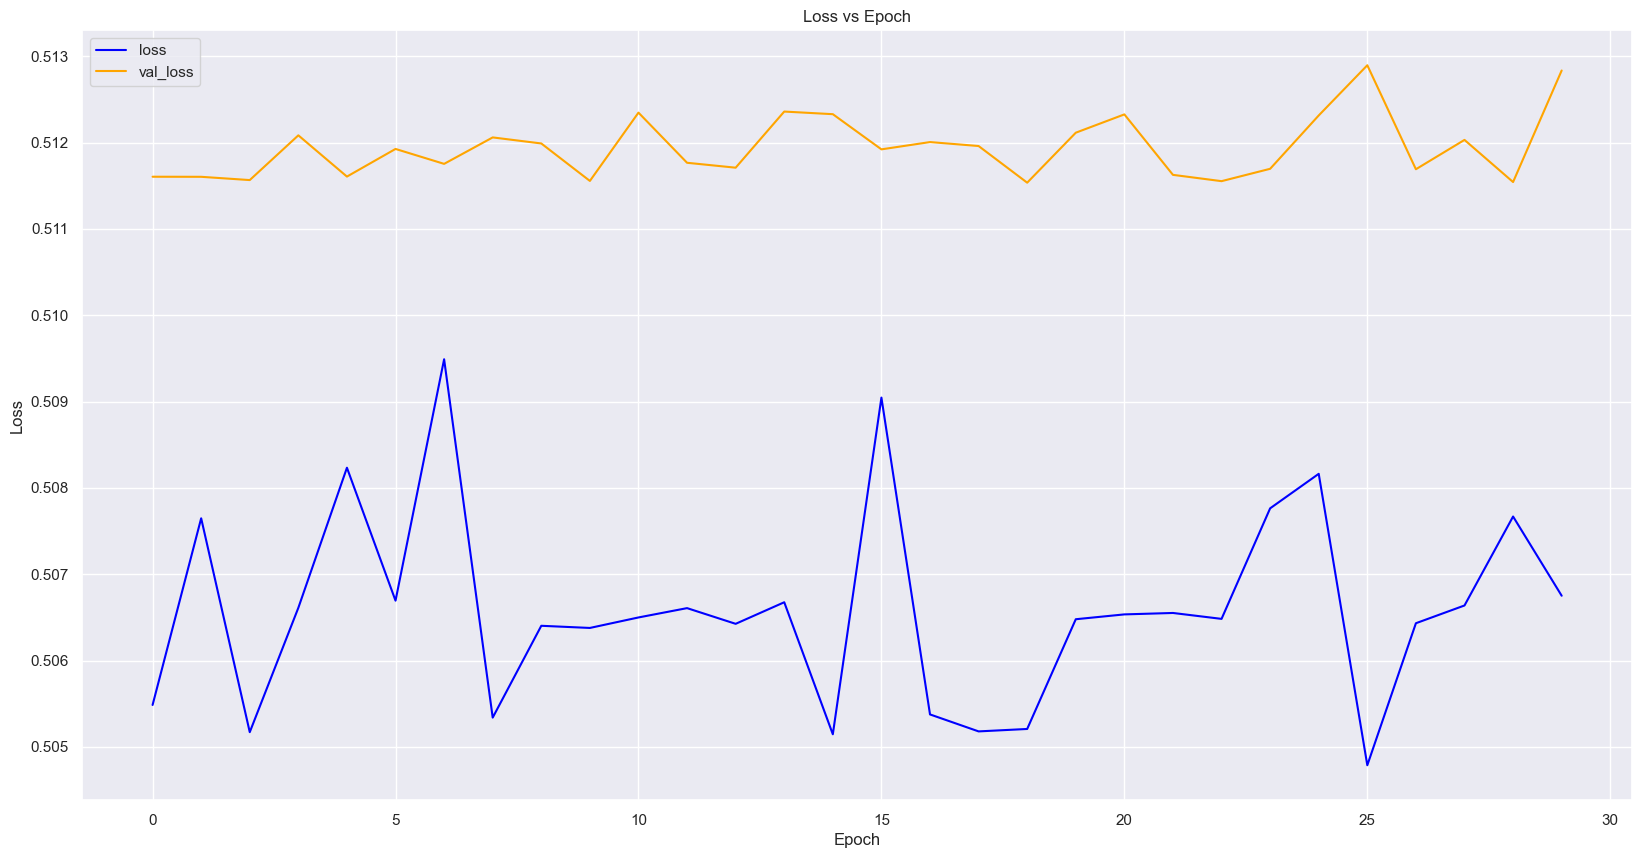

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8108 - loss: 0.4850
Test Loss: 0.48069068789482117
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.7969 - loss: 0.5048 - val_accuracy: 0.7961 - val_loss: 0.5115
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7996 - loss: 0.5011 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7977 - loss: 0.5036 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7967 - loss: 0.5049 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7975 - loss: 0.5040 - val

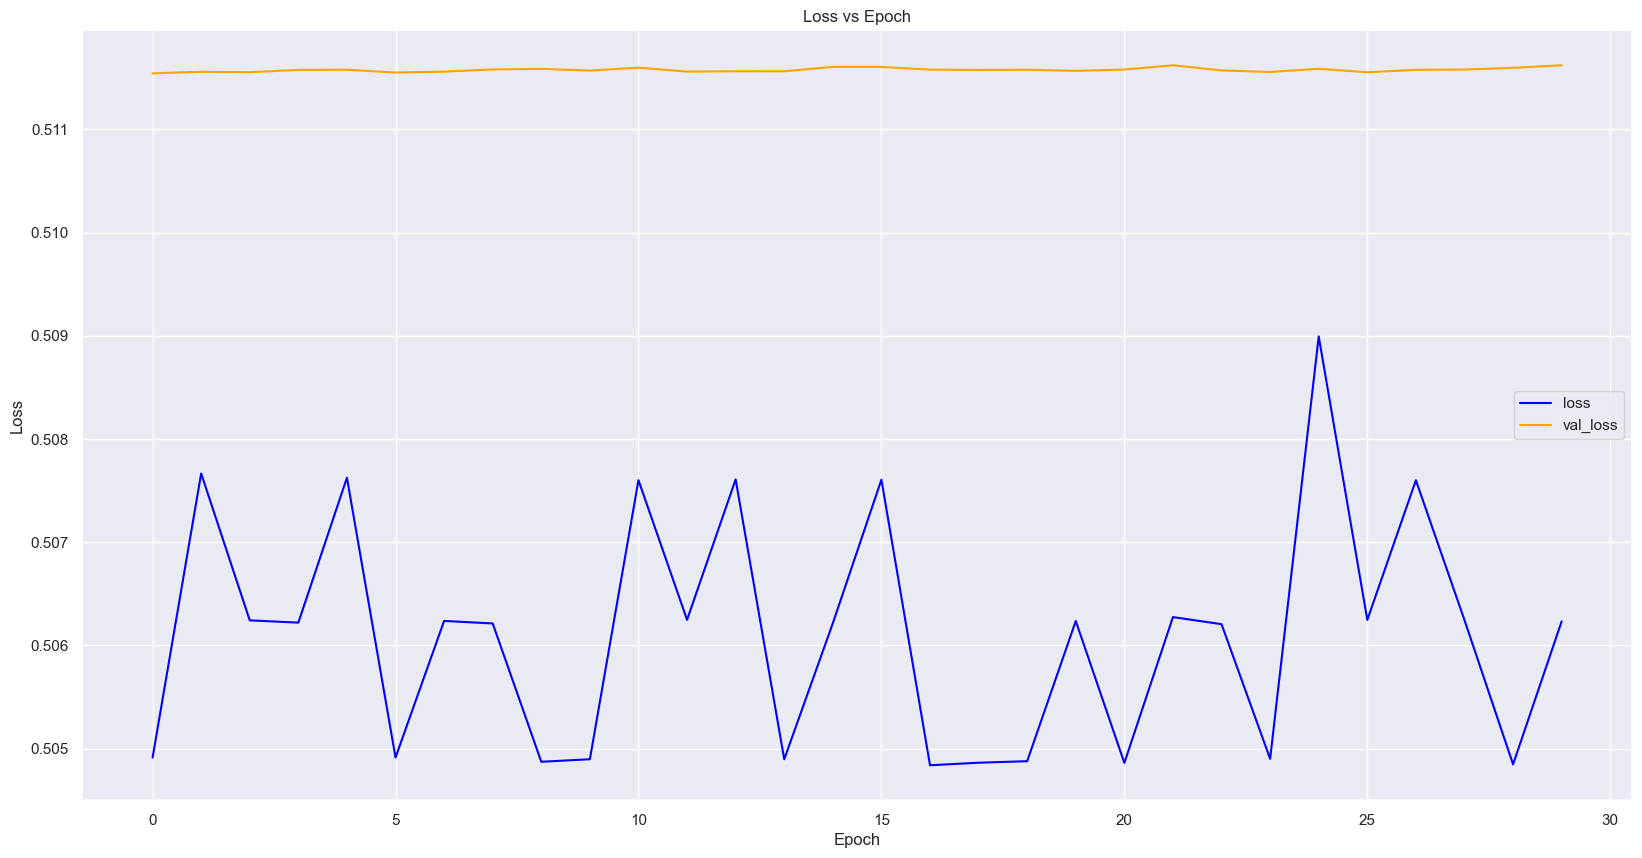

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8108 - loss: 0.4856
Test Loss: 0.48153072595596313
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.7891 - loss: 0.5156 - val_accuracy: 0.7961 - val_loss: 0.5117
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7903 - loss: 0.5138 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7979 - loss: 0.5034 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7985 - loss: 0.5025 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7876 - loss: 0.5174 - val

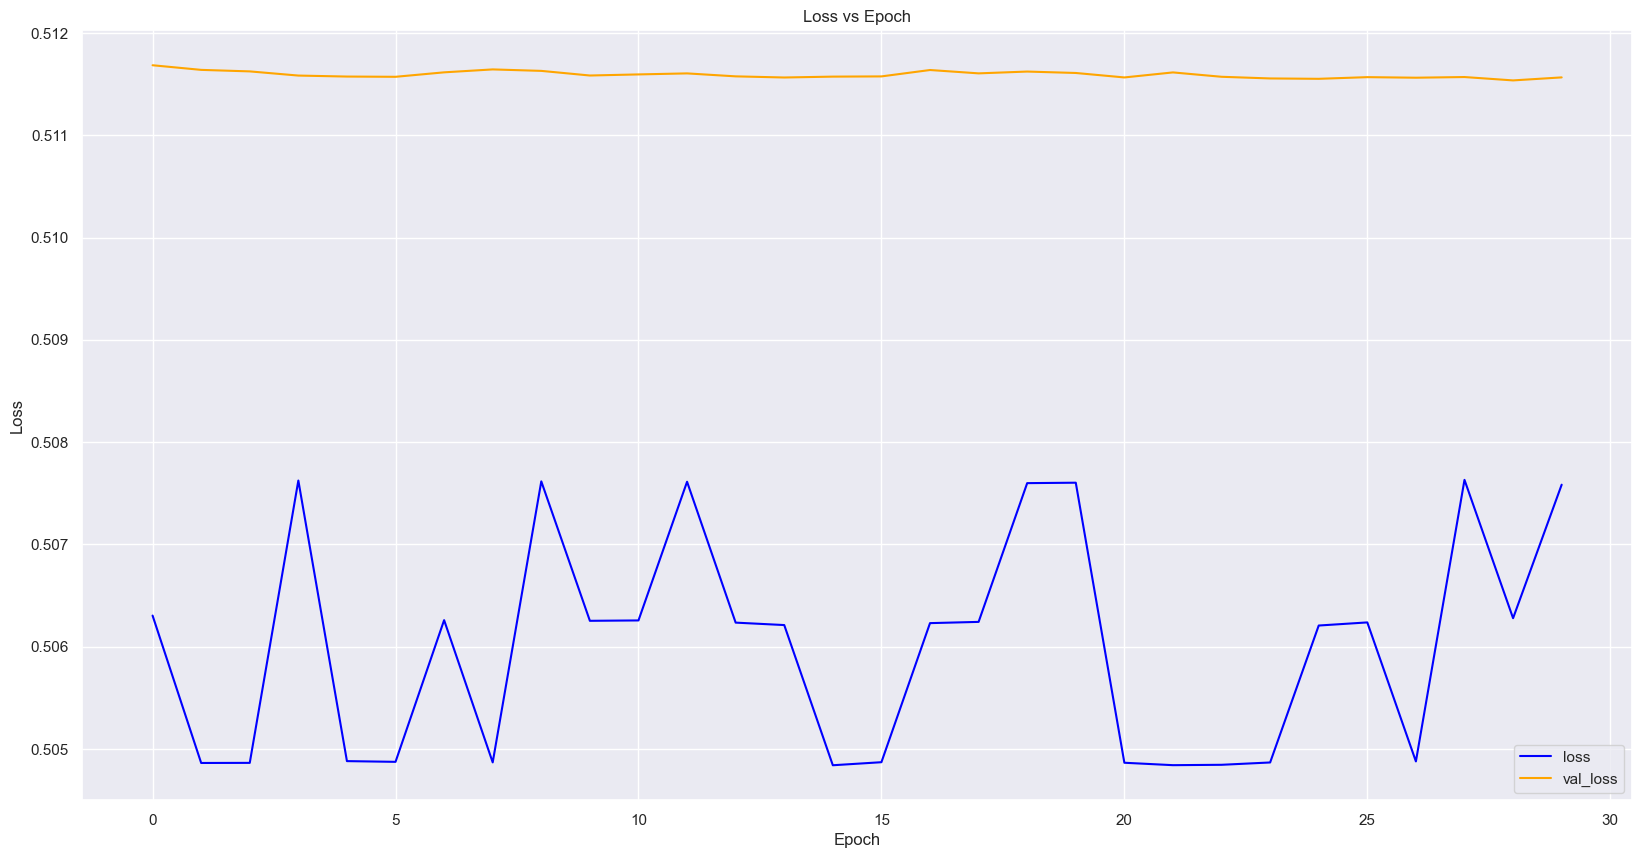

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8108 - loss: 0.4858
Test Loss: 0.4817359447479248
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________
Model with Learning Rate:  0.001
Number of Epochs:  30
Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.7925 - loss: 0.5116 - val_accuracy: 0.7961 - val_loss: 0.5119
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7972 - loss: 0.5044 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7978 - loss: 0.5034 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7886 - loss: 0.5161 - val_accuracy: 0.7961 - val_loss: 0.5116
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8023 - loss: 0.4973 - val_

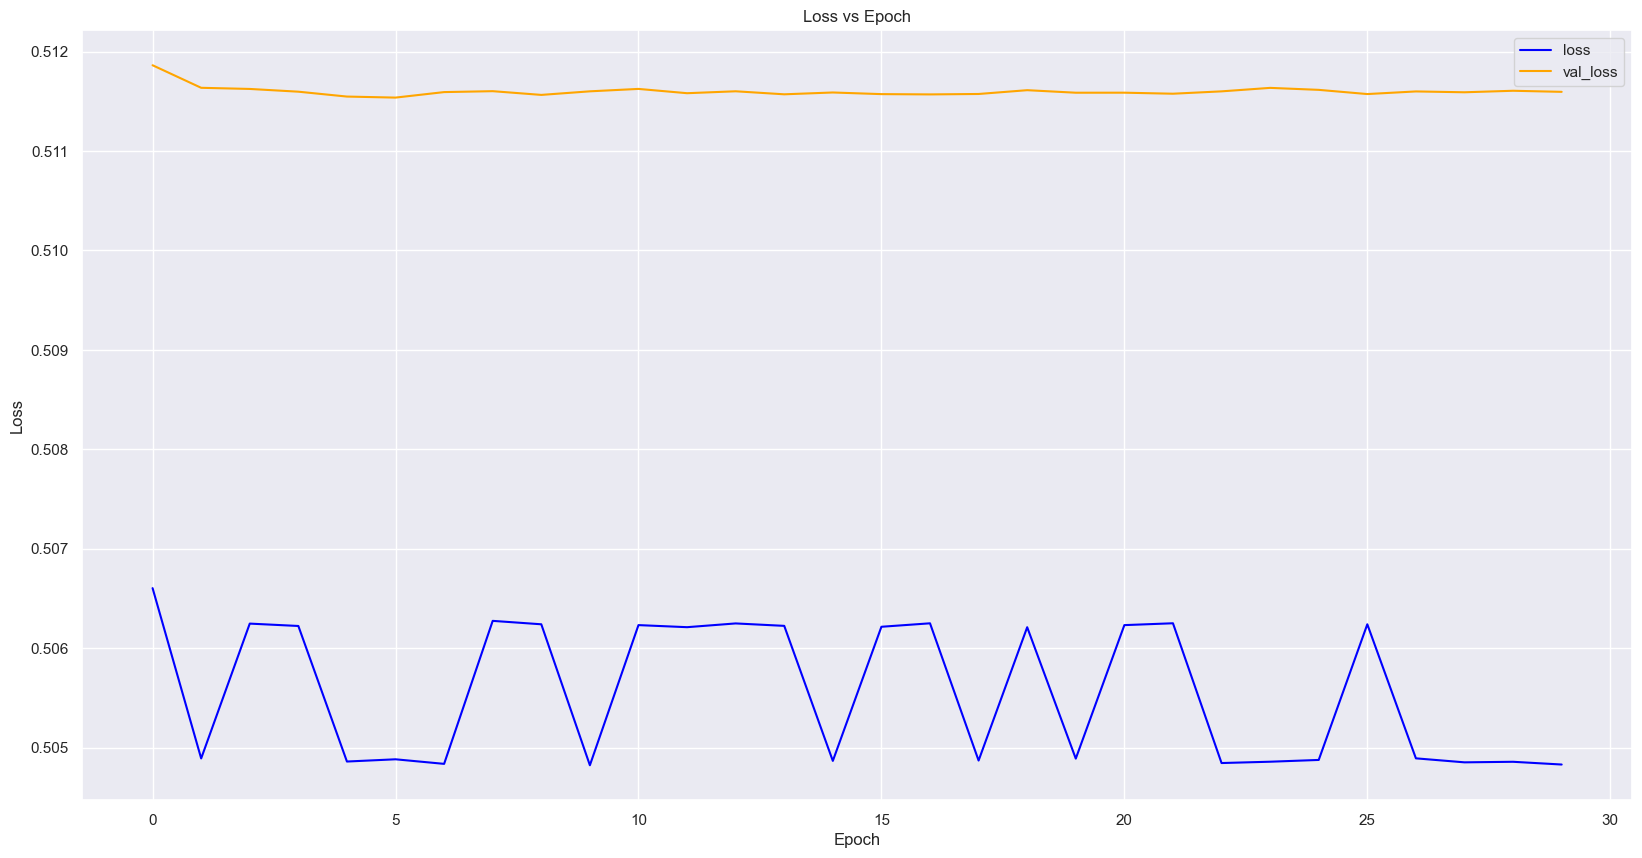

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8108 - loss: 0.4857
Test Loss: 0.48161637783050537
Test Accuracy: 0.8140668272972107
_______________________________________________________________________________________________
_______________________________________________________________________________________________


In [16]:
epochs = [10, 20, 30]
learningRates = [0.1, 0.01, 0.001]

batch_size = 32

for epoch in epochs:
    for rate in learningRates:
        runModels(model1, rate, epoch)
        runModels(model2, rate, epoch)
        runModels(model3, rate, epoch)